# 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


# 데이터 불러오기

In [2]:
users_df = pd.read_csv('train_users_2.csv')
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [4]:
users_df.count()

id                         213451
date_account_created       213451
timestamp_first_active     213451
date_first_booking          88908
gender                     213451
age                        125461
signup_method              213451
signup_flow                213451
language                   213451
affiliate_channel          213451
affiliate_provider         213451
first_affiliate_tracked    207386
signup_app                 213451
first_device_type          213451
first_browser              213451
country_destination        213451
dtype: int64

In [5]:
users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [6]:
sessions_df = pd.read_csv('sessions.csv')
sessions_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [7]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [8]:
sessions_df.count()

user_id          10533241
action           10488111
action_type       9441533
action_detail     9441533
device_type      10567737
secs_elapsed     10431706
dtype: int64

In [9]:
sessions_df.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

# users_df 전처리
- 18~122세 이외의 age -> null처리
- 범주형인데 object 타입 -> category 타입으로 변환
- date_account_created, date_first_booking : datetime 타입으로 변환 (%Y-%m-%d 형식)
- timestamp_first_active : datetime 타입으로 변환 (%Y-%m-%d %H:%M:%S 형식)

In [10]:
# age 컬럼에서 18세 이상 122세 이하의 값을 제외한 나머지 값을 null로 처리
users_df.loc[(users_df['age'] < 18) | (users_df['age'] > 122), 'age'] = np.nan

users_df.age.isnull().sum()

88929

In [11]:
# 변환할 컬럼 지정
columns_to_convert = [
    'gender', 'signup_method', 'language', 'affiliate_channel', 
    'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 
    'first_device_type', 'first_browser', 'country_destination'
]

for column in columns_to_convert:
    users_df[column] = users_df[column].astype('category')

print(users_df.dtypes)

id                           object
date_account_created         object
timestamp_first_active        int64
date_first_booking           object
gender                     category
age                         float64
signup_method              category
signup_flow                   int64
language                   category
affiliate_channel          category
affiliate_provider         category
first_affiliate_tracked    category
signup_app                 category
first_device_type          category
first_browser              category
country_destination        category
dtype: object


In [12]:
# date_account_created 및 date_first_booking 컬럼을 datetime 타입으로 변환
users_df['date_account_created'] = pd.to_datetime(users_df['date_account_created'])
users_df['date_first_booking'] = pd.to_datetime(users_df['date_first_booking'])

# timestamp_first_active는 타임스탬프 형식으로 되어있으므로 변환
users_df['timestamp_first_active'] = pd.to_datetime(users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [13]:
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [14]:
# 확인
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  category      
 5   age                      124522 non-null  float64       
 6   signup_method            213451 non-null  category      
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  category      
 9   affiliate_channel        213451 non-null  category      
 10  affiliate_provider       213451 non-null  category      
 11  first_affiliate_tracked  207386 non-null  category      
 12  signup_app      

# 세션 타임스탬프 만들기

## (1) secs_elapsed 이상치, NaN값 처리
- action 별 이상치 : 해당하는 행 제거 
- NaN값 : action 별 평균값으로 대체

※ 이상치는 boxplot 기준으로 (Q1 – 1.5 * IQR) 보다 작거나 (Q3 + 1.5 * IQR) 보다 큰 데이터를 이상치로 판단했다.

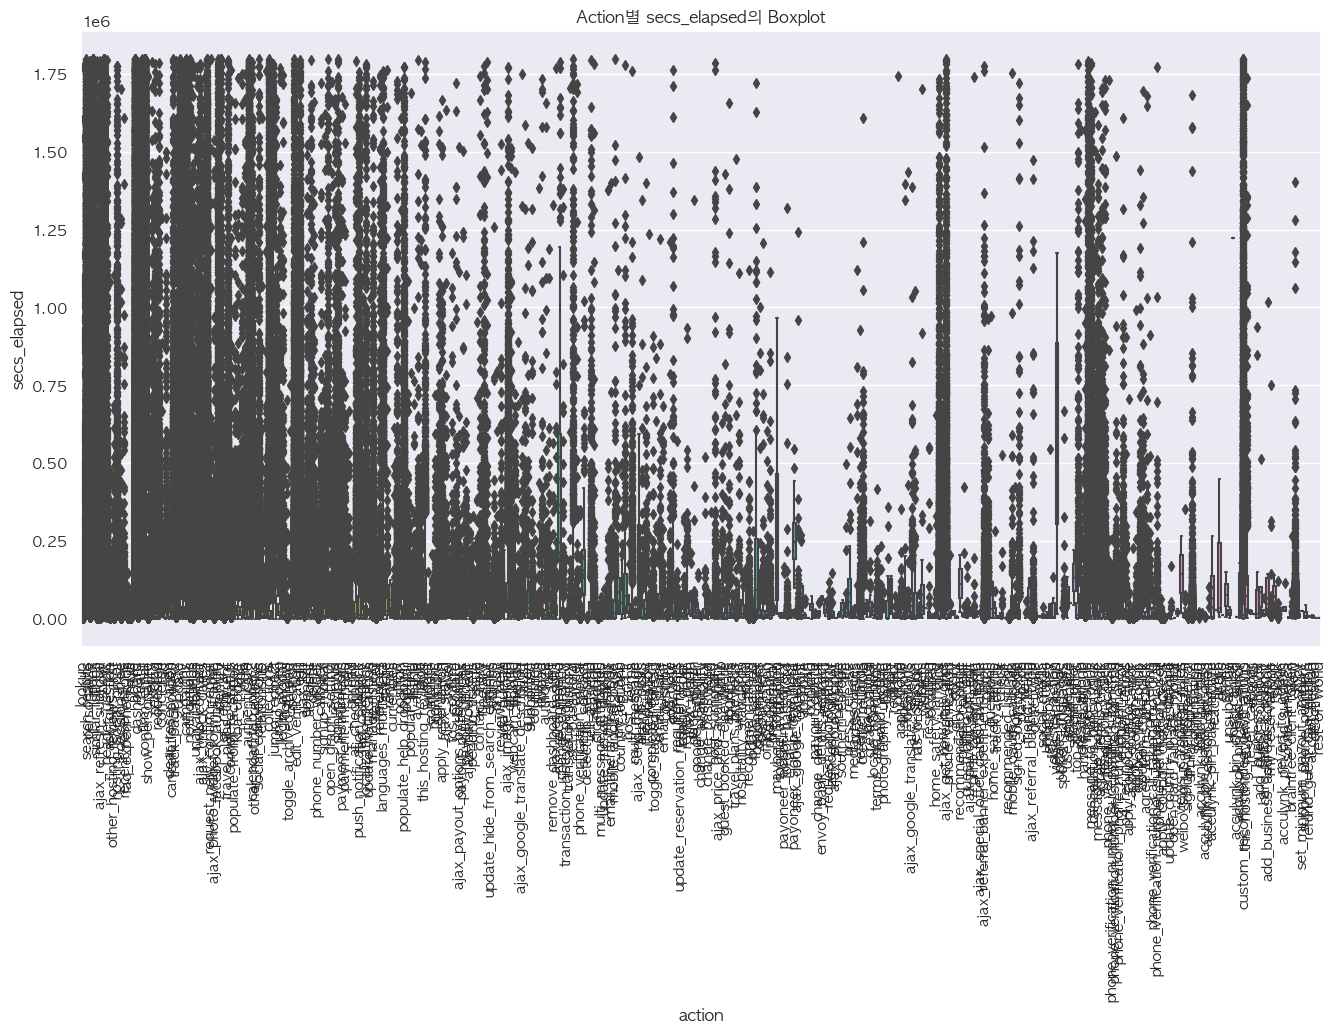

In [15]:
# 박스 플롯으로 데이터 파악
plt.figure(figsize=(16, 8))
sns.boxplot(x='action', y='secs_elapsed', data=sessions_df)
plt.xticks(rotation=90)
plt.title('Action별 secs_elapsed의 Boxplot')
plt.show()

In [16]:
# IQR을 이용한 이상치 제거
Q1 = sessions_df.groupby('action')['secs_elapsed'].transform(lambda x: x.quantile(0.25))
Q3 = sessions_df.groupby('action')['secs_elapsed'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
outlier_condition = ~(
    (sessions_df['secs_elapsed'] < (Q1 - 1.5 * IQR)) | 
    (sessions_df['secs_elapsed'] > (Q3 + 1.5 * IQR))
)
sessions_df = sessions_df[outlier_condition]

# 개수 확인
sessions_df.count()

user_id          9141598
action           9092126
action_type      8140368
action_detail    8140368
device_type      9171752
secs_elapsed     9035721
dtype: int64

In [17]:
# NaN 값 처리
def fillna_with_mean(group):
    mean_value = group['secs_elapsed'].mean()
    group['secs_elapsed'].fillna(mean_value, inplace=True)
    return group

# DataFrame에 함수 적용
sessions_df = sessions_df.groupby('action').apply(fillna_with_mean)

# 확인
sessions_df.isnull().sum()

user_id            30008
action                 0
action_type      1031384
action_detail    1031384
device_type            0
secs_elapsed           0
dtype: int64

## (2) 데이터 병합
- users_df의 id 컬럼명을 user_id로 변경한다.
- sessions_df에 users_df의 date_accout_created, date_first_booking, timestamp_fist_active, affiliate_channel (필요하다고 생각한 컬럼만 일단 추출했습니다.)컬럼을 추출하여 user_id 기준으로 LEFT JOIN 했다.

In [18]:
# 데이터 병합
users_df.rename(columns={'id': 'user_id'}, inplace=True) # 컬럼 이름 변경
merged_df = sessions_df.merge(users_df[['user_id', 'date_account_created', 'date_first_booking', 'timestamp_first_active', 'affiliate_channel']], on='user_id', how='left')

merged_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaT,2014-01-01 02:32:47,api
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct
5,8766khns50,10,message_post,message_post,iPhone,186000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct
6,8766khns50,10,message_post,message_post,iPhone,174000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct
7,fmcn5ps23k,10,message_post,message_post,iPhone,133837.0,2014-01-03,2014-01-04,2014-01-03 15:53:57,direct
8,fmcn5ps23k,10,message_post,message_post,iPhone,56758.0,2014-01-03,2014-01-04,2014-01-03 15:53:57,direct
9,rnc5rv3ric,10,message_post,message_post,iPhone,165000.0,2014-01-03,2014-01-04,2014-01-03 18:13:42,direct


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092126 entries, 0 to 9092125
Data columns (total 10 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 object        
 1   action                  object        
 2   action_type             object        
 3   action_detail           object        
 4   device_type             object        
 5   secs_elapsed            float64       
 6   date_account_created    datetime64[ns]
 7   date_first_booking      datetime64[ns]
 8   timestamp_first_active  datetime64[ns]
 9   affiliate_channel       category      
dtypes: category(1), datetime64[ns](3), float64(1), object(5)
memory usage: 633.0+ MB


## (3) 세션 타임스탬프 계산
각 유저id별로 timestamp_first_active(첫 번째 활동의 타임스탬프)에 secs_elapsed(해당 이벤트부터 다음 이벤트까지 세션 경과시간)을 더해서 session_timestamp 컬럼을 새롭게 생성해 그곳에 정보를 담는다.

In [20]:
# 세션 타임스탬프 계산
merged_df['session_timestamp'] = merged_df['timestamp_first_active'] + pd.to_timedelta(merged_df['secs_elapsed'], unit='s')
merged_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel,session_timestamp
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaT,2014-01-01 02:32:47,api,2014-01-01 13:08:00
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct,2014-01-02 05:23:52
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct,2014-01-02 03:03:31
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-04 18:03:32
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-05 10:10:12
...,...,...,...,...,...,...,...,...,...,...,...
9092121,osn94hm062,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,18959.0,NaT,NaT,NaT,NaN,NaT
9092122,cpszutqnd1,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,21890.0,NaT,NaT,NaT,NaN,NaT
9092123,ii1y9pqmsc,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,10513.0,NaT,NaT,NaT,NaN,NaT
9092124,ssqamfzu1e,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,1222.0,NaT,NaT,NaT,NaN,NaT


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092126 entries, 0 to 9092125
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 object        
 1   action                  object        
 2   action_type             object        
 3   action_detail           object        
 4   device_type             object        
 5   secs_elapsed            float64       
 6   date_account_created    datetime64[ns]
 7   date_first_booking      datetime64[ns]
 8   timestamp_first_active  datetime64[ns]
 9   affiliate_channel       category      
 10  session_timestamp       datetime64[ns]
dtypes: category(1), datetime64[ns](4), float64(1), object(5)
memory usage: 702.3+ MB


# 기기별로 DAU, MAU, WAU 계산 및 시각화

## 한 사용자 당 여러 대 기기를 사용했는지 여부 확인

In [22]:
# 각 user_id별로 사용한 device_type의 개수를 계산
device_type_count = merged_df.groupby('user_id')['device_type'].nunique().reset_index()
device_type_count.columns = ['user_id', 'device_type_count']

# device_type_count의 통계 요약을 확인
print(device_type_count['device_type_count'].describe())

count    134980.000000
mean          1.261231
std           0.501738
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: device_type_count, dtype: float64


In [23]:
device_type_count

,user_id,device_type_count
0,00023iyk9l,2
1,0010k6l0om,1
2,001wyh0pz8,1
3,0028jgx1x1,2
4,002qnbzfs5,2
...,...,...
134975,zzxox7jnrx,1
134976,zzy7t0y9cm,1
134977,zzysuoqg6x,1
134978,zzywmcn0jv,1


※ 하나의 user_id당 여러 종류의 기기를 사용한 유저가 존재한다.

- 여러 기기를 사용한 사람들만 따로 파악해보기
- 어떤 기기가 더 사용자가 많이 사용했는지
- 예약할 때 사용한 기기는 어떤 건지
- 회원 가입시 사용한 기기는 어떤게 더 많았는지
- 최초 사용 기기는 어떤게 더 많았는지 + 사용자가 사이트에 방문한 경로랑 어떤 연관이 있는지

In [24]:
# device_type_count에서 하나의 기기만 사용한 사용자의 비율과 여러 기기를 사용한 사용자의 비율을 계산
single_device_users = device_type_count[device_type_count['device_type_count'] == 1].shape[0]
multiple_device_users = device_type_count[device_type_count['device_type_count'] > 1].shape[0]

total_users = device_type_count.shape[0]
single_device_ratio = (single_device_users / total_users) * 100
multiple_device_ratio = (multiple_device_users / total_users) * 100

print(f"하나의 기기만 사용한 사용자의 비율: {single_device_ratio:.2f}%")
print(f"여러 기기를 사용한 사용자의 비율: {multiple_device_ratio:.2f}%")

하나의 기기만 사용한 사용자의 비율: 76.62%
여러 기기를 사용한 사용자의 비율: 23.38%


► 한 가지 기기만 사용한 유저 : 여러 기기를 사용한 유저 = 약 3: 1

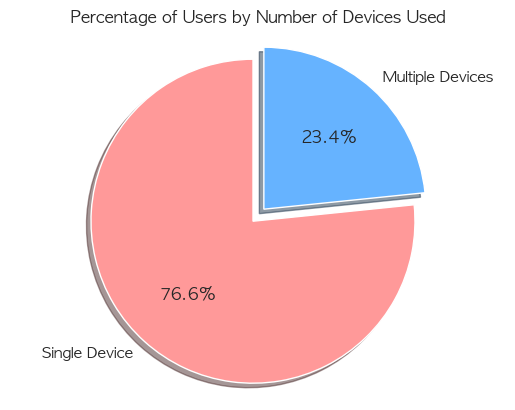

In [25]:
# 하나의 기기만 사용한 사용자와 여러 기기를 사용한 사용자의 비율을 시각화
labels = ['Single Device', 'Multiple Devices']
sizes = [single_device_ratio, multiple_device_ratio]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # 첫 번째 조각을 약간 떼어놓음

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # 원을 둥글게 그림

plt.title('Percentage of Users by Number of Devices Used')
plt.show()

## device_type 별 DAU, WAU, MAU 계산

In [26]:
# Device type 별 DAU, WAU, MAU 계산 함수 정의
def calculate_active_users_device(merged_df, freq):
    active_users = merged_df.groupby([pd.Grouper(key='session_timestamp', freq=freq), 'device_type'])['user_id'].nunique().reset_index()
    active_users = active_users.pivot(index='session_timestamp', columns='device_type', values='user_id').fillna(0)
    return active_users

In [27]:
# DAU
dau = calculate_active_users_device(merged_df, 'D')
dau.reset_index(inplace=True)
dau['month'] = dau['session_timestamp'].dt.month

dau

device_type,session_timestamp,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch,month
0,2014-01-01,30.0,14.0,3.0,0.0,0.0,1.0,50.0,0.0,0.0,36.0,0.0,16.0,15.0,0.0,1
1,2014-01-02,54.0,28.0,8.0,0.0,1.0,6.0,143.0,0.0,3.0,133.0,0.0,31.0,36.0,0.0,1
2,2014-01-03,71.0,36.0,7.0,0.0,1.0,3.0,198.0,0.0,4.0,174.0,0.0,36.0,55.0,0.0,1
3,2014-01-04,55.0,24.0,7.0,0.0,3.0,0.0,190.0,0.0,3.0,132.0,0.0,34.0,55.0,0.0,1
4,2014-01-05,60.0,29.0,5.0,0.0,3.0,2.0,189.0,0.0,5.0,127.0,0.0,43.0,58.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2014-07-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7
188,2014-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
189,2014-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
190,2014-07-12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [28]:
# WAU calculation
wau = calculate_active_users_device(merged_df, 'W')
wau.reset_index(inplace=True)

wau

device_type,session_timestamp,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch
0,2014-01-05,244.0,91.0,20.0,0.0,5.0,7.0,503.0,0.0,10.0,384.0,0.0,122.0,160.0,0.0
1,2014-01-12,405.0,132.0,37.0,2.0,3.0,10.0,1065.0,0.0,15.0,851.0,1.0,234.0,278.0,2.0
2,2014-01-19,466.0,158.0,58.0,4.0,9.0,5.0,1136.0,0.0,24.0,1003.0,0.0,214.0,311.0,1.0
3,2014-01-26,397.0,157.0,43.0,1.0,5.0,11.0,1061.0,1.0,28.0,870.0,2.0,200.0,249.0,2.0
4,2014-02-02,357.0,151.0,53.0,1.0,5.0,10.0,1007.0,1.0,23.0,906.0,1.0,180.0,246.0,0.0
5,2014-02-09,370.0,160.0,68.0,4.0,11.0,17.0,1062.0,0.0,18.0,885.0,1.0,175.0,218.0,2.0
6,2014-02-16,381.0,160.0,51.0,5.0,14.0,13.0,1067.0,0.0,22.0,839.0,3.0,206.0,269.0,2.0
7,2014-02-23,347.0,165.0,51.0,3.0,10.0,12.0,1048.0,0.0,22.0,860.0,1.0,197.0,265.0,0.0
8,2014-03-02,380.0,171.0,58.0,2.0,9.0,10.0,1124.0,0.0,24.0,928.0,1.0,191.0,366.0,0.0
9,2014-03-09,427.0,163.0,59.0,0.0,10.0,17.0,1164.0,0.0,23.0,856.0,1.0,184.0,369.0,0.0


In [29]:
# MAU calculation
mau = calculate_active_users_device(merged_df, 'M')
mau.reset_index(inplace=True)
mau['month'] = mau['session_timestamp'].dt.month

mau

device_type,session_timestamp,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch,month
0,2014-01-31,1745.0,607.0,194.0,6.0,25.0,33.0,4184.0,1.0,87.0,3557.0,3.0,800.0,1107.0,5.0,1
1,2014-02-28,1432.0,616.0,214.0,15.0,39.0,47.0,3934.0,0.0,78.0,3326.0,6.0,708.0,991.0,4.0,2
2,2014-03-31,1921.0,716.0,270.0,6.0,37.0,57.0,4739.0,0.0,86.0,3653.0,7.0,861.0,1593.0,4.0,3
3,2014-04-30,2110.0,756.0,311.0,11.0,32.0,52.0,4886.0,0.0,112.0,4181.0,7.0,967.0,2965.0,6.0,4
4,2014-05-31,2485.0,39.0,1058.0,5.0,46.0,79.0,5501.0,0.0,199.0,4871.0,9.0,1187.0,3782.0,9.0,5
5,2014-06-30,3099.0,38.0,1294.0,11.0,55.0,54.0,5641.0,0.0,202.0,4756.0,15.0,1294.0,4568.0,11.0,6
6,2014-07-31,35.0,2.0,26.0,0.0,1.0,1.0,181.0,0.0,6.0,169.0,0.0,32.0,123.0,0.0,7


## 1) DAU 시각화

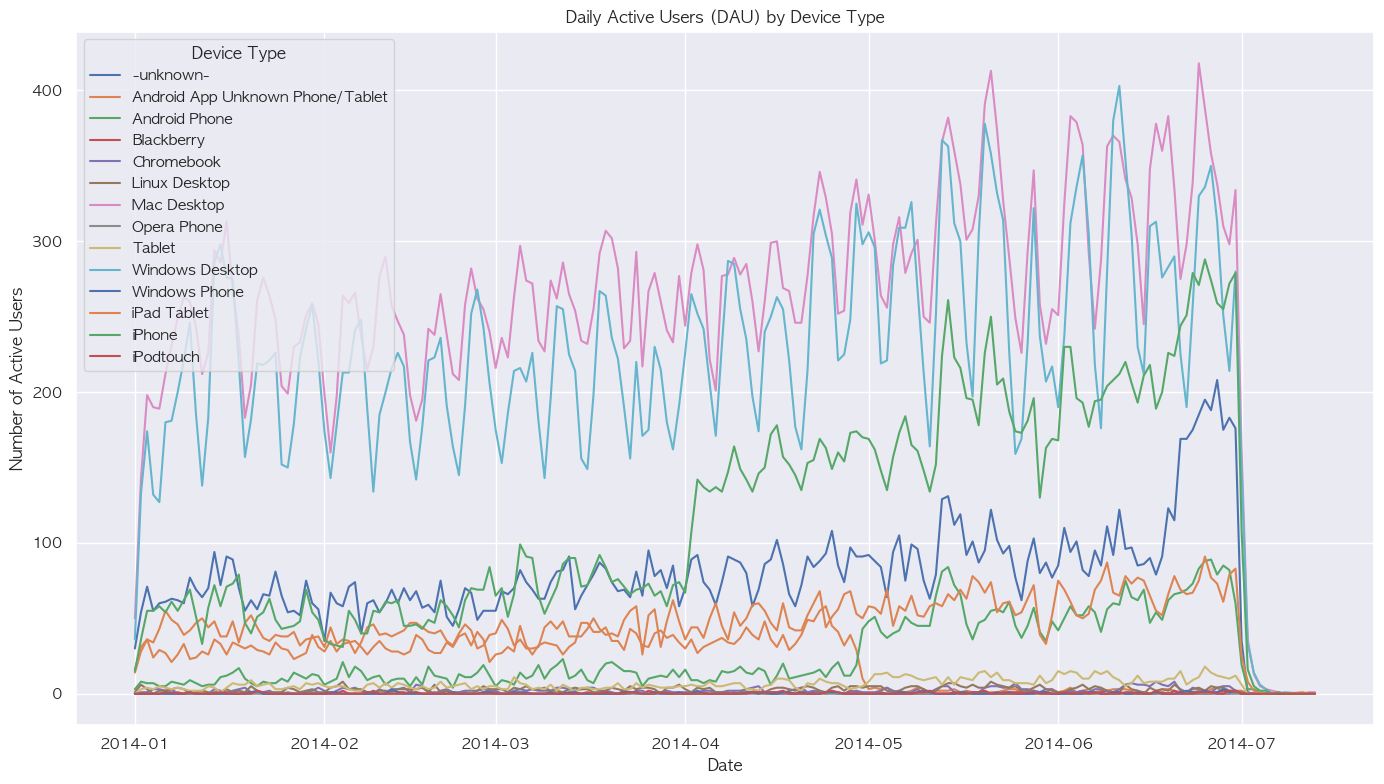

In [30]:
# 시각화 함수 정의
def plot_active_users_device(df, title):
    plt.figure(figsize=(14, 8))
    for device_type in df.columns[1:-1]:  # Exclude 'session_timestamp' and 'month'
        plt.plot(df['session_timestamp'], df[device_type], label=device_type)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Active Users')
    plt.legend(title='Device Type')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 사용 기기별 일일 활성 사용자 시각화
plot_active_users_device(dau, 'Daily Active Users (DAU) by Device Type')

- 전반적으로 증가하는 추세이긴하지만, 모바일 환경에서보다는 데스크톱 환경에서 가장 많은 활성 사용자를 보유하고 있음을 파악했다.
- iPod touch와 black berry는 타 기기보다 현저히 낮은 일일 활성 사용자를 보유하고 있다. 해당 두 기기의 경우, 화면의 크기가 다른 기기들에 비해 작다. 숙소 예약 서비스의 경우, 공간에 대한 전반적인 분위기를 사진 한장으로 가늠할 수 있는 것이 중요한데, 화면이 작으면 큰 기기에 비해 파악이 어렵고 사용자가 답답함을 느낄 수 있다고 추측된다.
- iPhone의 경우, 2014년 4월, 5월 중반에 급격하게 활성 사용자가 증가했다.
- Windows Phone의 경우, 2014년 6월 중반에 급격하게 활성 사용자가 증가했다.

## 2) WAU 시각화

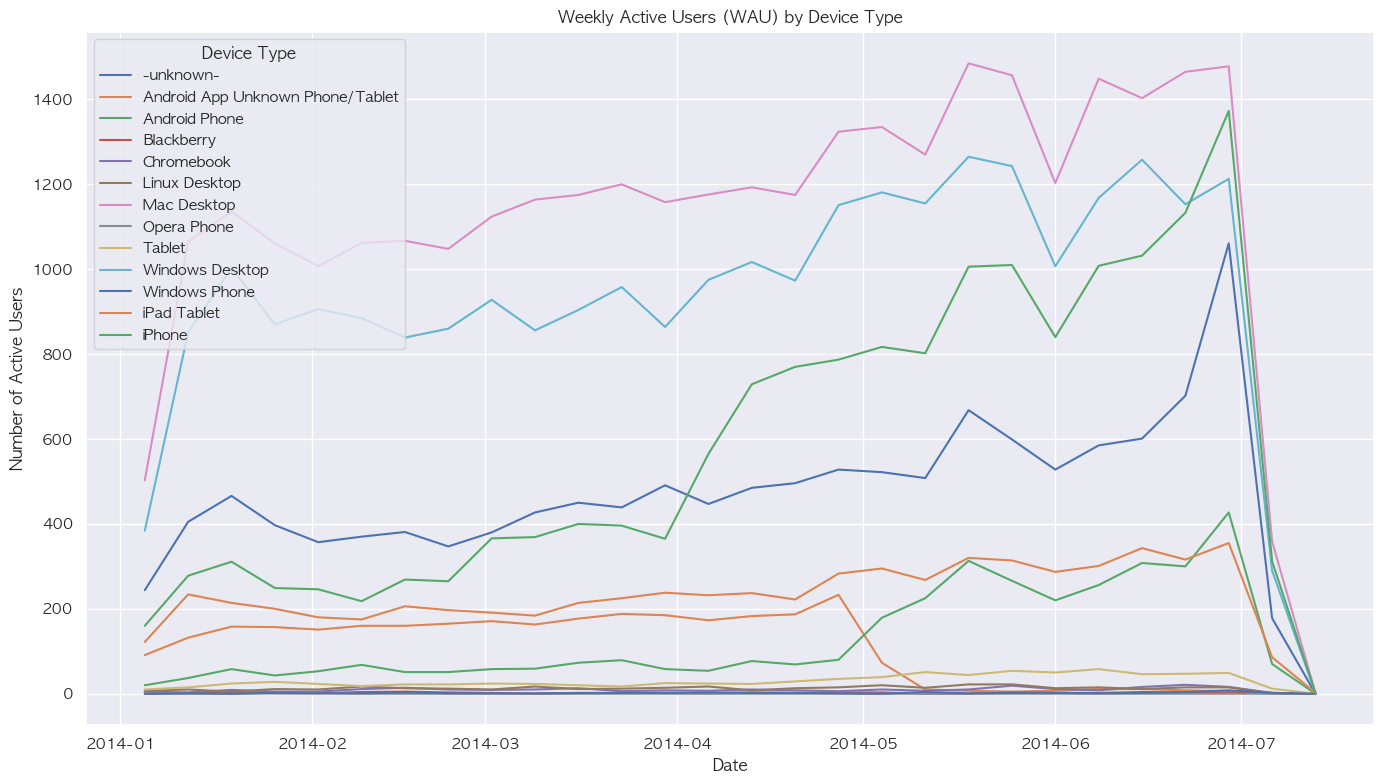

In [31]:
plot_active_users_device(wau, 'Weekly Active Users (WAU) by Device Type')

## 3) MAU 시각화

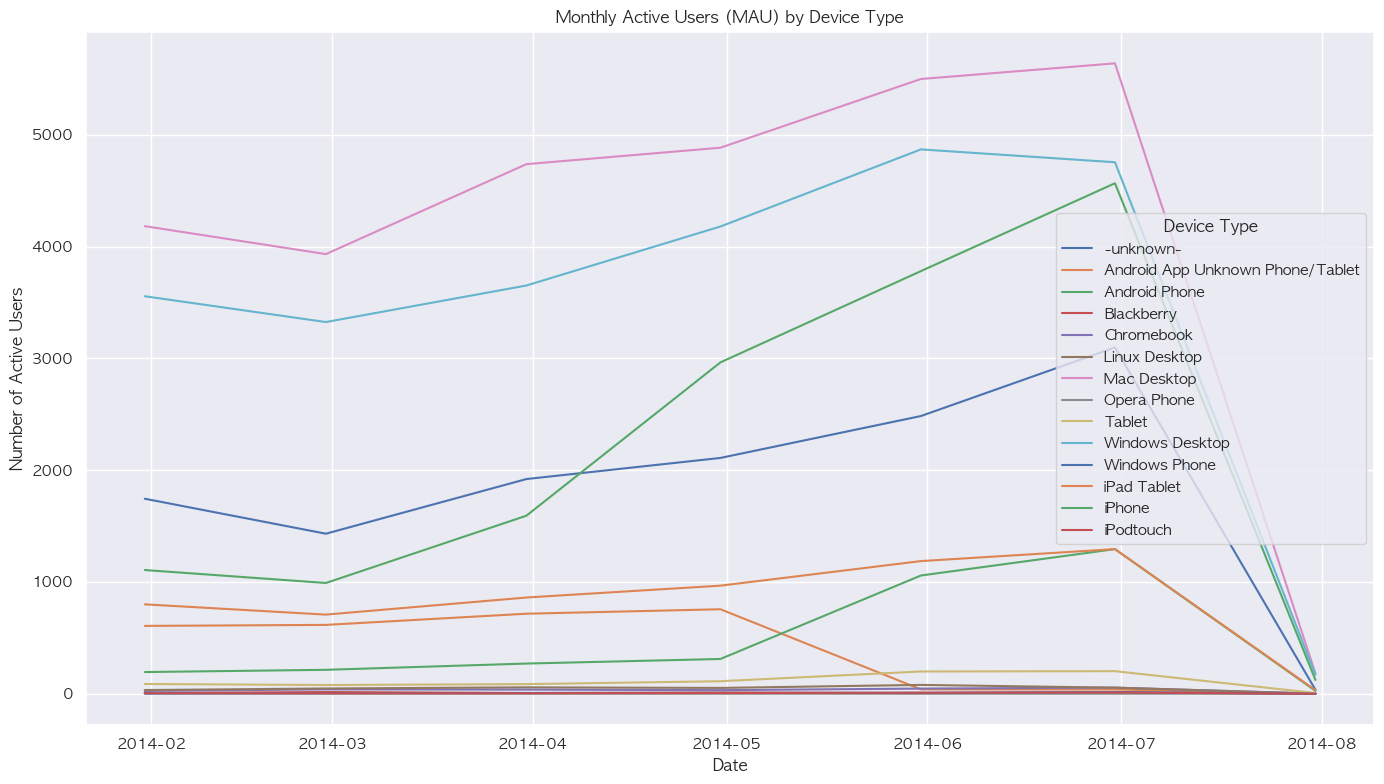

In [32]:
plot_active_users_device(mau, 'Monthly Active Users (MAU) by Device Type')

# 기기 별 Stickiness 계산 및 시각화

device_type 중 위에서 구한 mau 기준으로 상위 5개 기기를 추출해 해당 기기별 서비스 고착도를 구해보았다.

In [33]:
# 전체 기간 동안의 device_type별 mau 값 계산
mau_total = merged_df.groupby('device_type')['user_id'].nunique().reset_index()
mau_total = mau_total.rename(columns={'user_id': 'mau_total'})

# 상위 5개의 device_type 추출
top_5_device_types = mau_total.nlargest(5, 'mau_total')['device_type'].tolist()

top_5_device_types

['Mac Desktop', 'Windows Desktop', 'iPhone', '-unknown-', 'Android Phone']

In [34]:
# Device type 별 DAU, MAU 계산 함수 정의
def calculate_active_users_device5(merged_df, freq):
    active_users = merged_df.groupby([pd.Grouper(key='session_timestamp', freq=freq), 'device_type'])['user_id'].nunique().reset_index()
    return active_users

In [35]:
# Mac Desktop 유저들의 DAU 계산
dau = calculate_active_users_device5(merged_df[merged_df['device_type'] == 'Mac Desktop'], 'D')
dau = dau.rename(columns={'user_id': 'dau'})
dau['month'] = dau['session_timestamp'].dt.month

dau

,session_timestamp,device_type,dau,month
0,2014-01-01,Mac Desktop,50,1
1,2014-01-02,Mac Desktop,143,1
2,2014-01-03,Mac Desktop,198,1
3,2014-01-04,Mac Desktop,190,1
4,2014-01-05,Mac Desktop,189,1
...,...,...,...,...
185,2014-07-05,Mac Desktop,3,7
186,2014-07-06,Mac Desktop,2,7
187,2014-07-07,Mac Desktop,1,7
188,2014-07-12,Mac Desktop,1,7


In [36]:
# Mac Desktop 유저들의 MAU 계산
mau = calculate_active_users_device5(merged_df[merged_df['device_type'] == 'Mac Desktop'], 'M')
mau = mau.rename(columns={'user_id': 'mau'})
mau['month'] = mau['session_timestamp'].dt.month

mau

,session_timestamp,device_type,mau,month
0,2014-01-31,Mac Desktop,4184,1
1,2014-02-28,Mac Desktop,3934,2
2,2014-03-31,Mac Desktop,4739,3
3,2014-04-30,Mac Desktop,4886,4
4,2014-05-31,Mac Desktop,5501,5
5,2014-06-30,Mac Desktop,5641,6
6,2014-07-31,Mac Desktop,181,7


In [37]:
# DAU에서 필요한 컬럼만 추출
dau_selected = dau[['session_timestamp', 'dau', 'month']]

# MAU에서 필요한 컬럼만 추출
mau_selected = mau[['mau', 'month']]

# DAU와 MAU 병합
MacDesktop_df = pd.merge(dau_selected, mau_selected, on='month', how='left')

# Stickiness 계산
MacDesktop_df['stickiness'] = (MacDesktop_df['dau'] / MacDesktop_df['mau']) * 100

MacDesktop_df

,session_timestamp,dau,month,mau,stickiness
0,2014-01-01,50,1,4184,1.195029
1,2014-01-02,143,1,4184,3.417782
2,2014-01-03,198,1,4184,4.732314
3,2014-01-04,190,1,4184,4.541109
4,2014-01-05,189,1,4184,4.517208
...,...,...,...,...,...
185,2014-07-05,3,7,181,1.657459
186,2014-07-06,2,7,181,1.104972
187,2014-07-07,1,7,181,0.552486
188,2014-07-12,1,7,181,0.552486


In [38]:
MacDesktop_df.describe()

,session_timestamp,dau,month,mau,stickiness
count,190,190.000000,190.000000,190.000000,190.000000
mean,2014-04-05 13:00:37.894736896,262.152632,3.673684,4603.868421,6.059321
min,2014-01-01 00:00:00,1.000000,1.000000,181.000000,0.552486
25%,2014-02-17 06:00:00,234.000000,2.000000,4184.000000,5.033482
50%,2014-04-05 12:00:00,264.000000,4.000000,4739.000000,5.699959
75%,2014-05-22 18:00:00,300.750000,5.000000,5501.000000,6.284037
max,2014-07-13 00:00:00,418.000000,7.000000,5641.000000,88.950276
std,NaN,75.959422,1.831194,1159.863616,6.244654


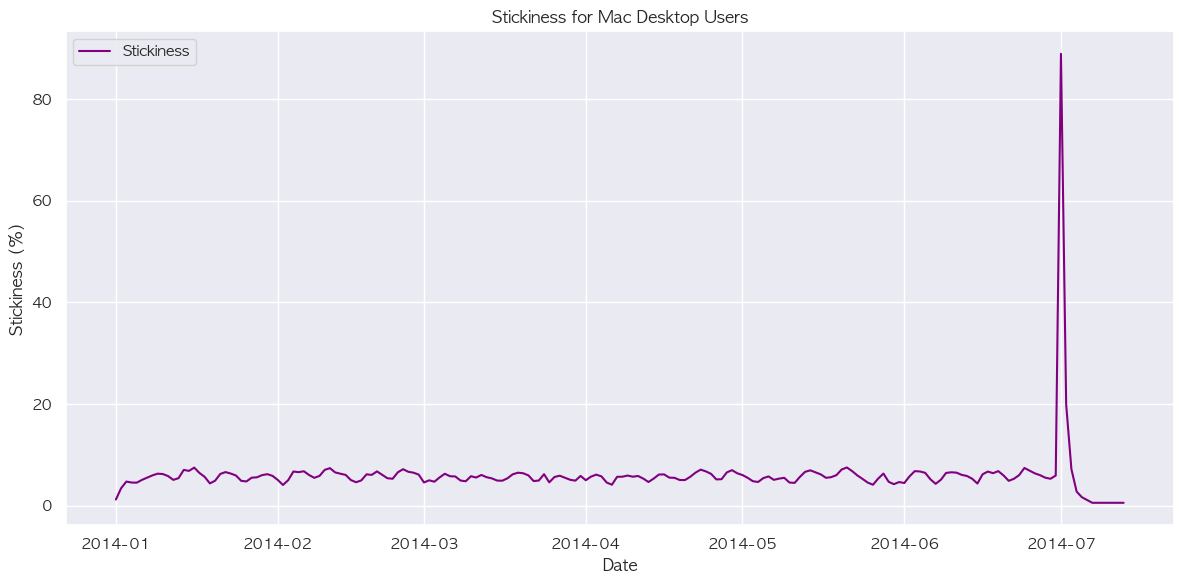

In [39]:
# Mac Desktop 유저들의 Stickiness 시각화

plt.figure(figsize=(12, 6))
plt.plot(MacDesktop_df['session_timestamp'], MacDesktop_df['stickiness'], label='Stickiness', color='purple')
plt.title('Stickiness for Mac Desktop Users')
plt.xlabel('Date')
plt.ylabel('Stickiness (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Stickiness가 2014-07 이후를 제외하고는 전부 20%를 넘지 못하는 것 같아서 y축(Stickiness) 눈금을 조정하여 좀 더 자세히 변화를 살펴보았다.

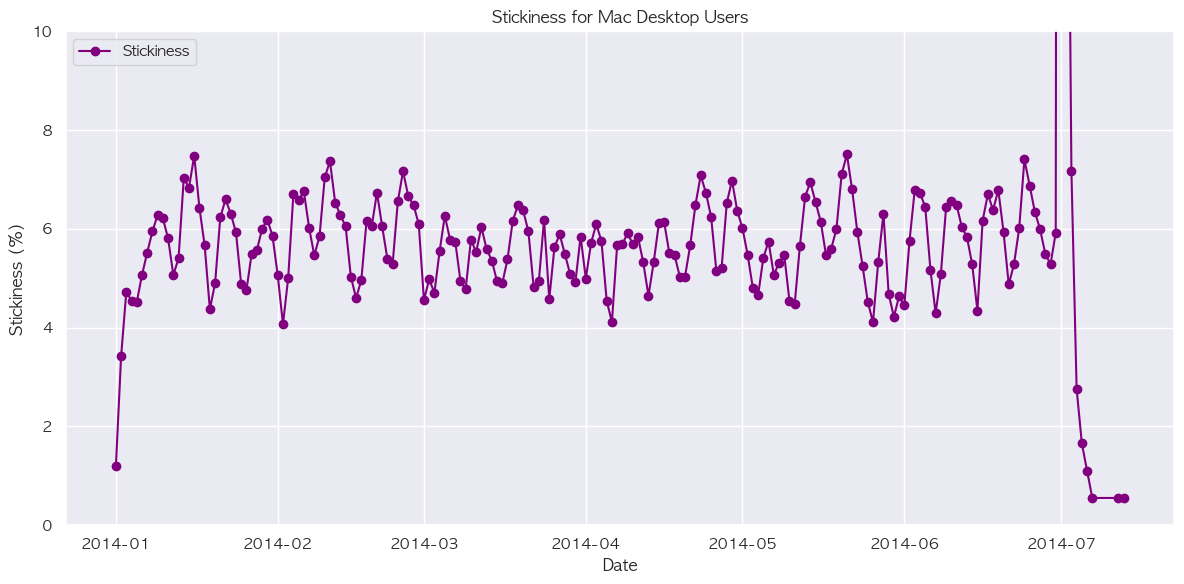

In [40]:
# y축 눈금 조정해서 다시 시각화
plt.figure(figsize=(12, 6))
plt.plot(MacDesktop_df['session_timestamp'], MacDesktop_df['stickiness'], label='Stickiness', marker='o', color='purple')
plt.title('Stickiness for Mac Desktop Users')
plt.xlabel('Date')
plt.ylabel('Stickiness (%)')
plt.ylim(0, 10)  # y축 눈금 범위를 0에서 10%로 설정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- 2014년 상반기 Mac Desktop 사용자들의 에어비엔비 서비스 고착도는 대부분 8%를 넘지 못했다. 상당히 낮은 수준을 보였다.
- 전체적으로 4~8% 이내를 멤돌고 있기에 전반적으로 안정적인 편이지만, 서비스 고착도는 100%에 가까울수록 에어비엔비 서비스에 대한 사용자들의 의존도가 높다고 해석하기 때문에 서비스 의존도 자체는 매우 낮다고 판단된다.

In [41]:
# Windows Desktop 유저들의 DAU 계산
dau = calculate_active_users_device5(merged_df[merged_df['device_type'] == 'Windows Desktop'], 'D')
dau = dau.rename(columns={'user_id': 'dau'})
dau['month'] = dau['session_timestamp'].dt.month

# Windows Desktop 유저들의 MAU 계산
mau = calculate_active_users_device5(merged_df[merged_df['device_type'] == 'Windows Desktop'], 'M')
mau = mau.rename(columns={'user_id': 'mau'})
mau['month'] = mau['session_timestamp'].dt.month

# DAU에서 필요한 컬럼만 추출
dau_selected = dau[['session_timestamp', 'dau', 'month']]

# MAU에서 필요한 컬럼만 추출
mau_selected = mau[['mau', 'month']]

# DAU와 MAU 병합
WindowsDesktop_df = pd.merge(dau_selected, mau_selected, on='month', how='left')

# Stickiness 계산
WindowsDesktop_df['stickiness'] = (WindowsDesktop_df['dau'] / WindowsDesktop_df['mau']) * 100

WindowsDesktop_df.describe()

,session_timestamp,dau,month,mau,stickiness
count,187,187.000000,187.000000,187.000000,187.000000
mean,2014-04-04 00:15:24.064171008,226.877005,3.620321,3939.909091,6.202249
min,2014-01-01 00:00:00,1.000000,1.000000,169.000000,0.591716
25%,2014-02-16 12:00:00,182.500000,2.000000,3557.000000,4.790583
50%,2014-04-04 00:00:00,221.000000,4.000000,3653.000000,5.858199
75%,2014-05-20 12:00:00,271.500000,5.000000,4756.000000,6.581161
max,2014-07-08 00:00:00,403.000000,7.000000,4871.000000,87.573964
std,NaN,70.247266,1.796117,902.705109,6.209000


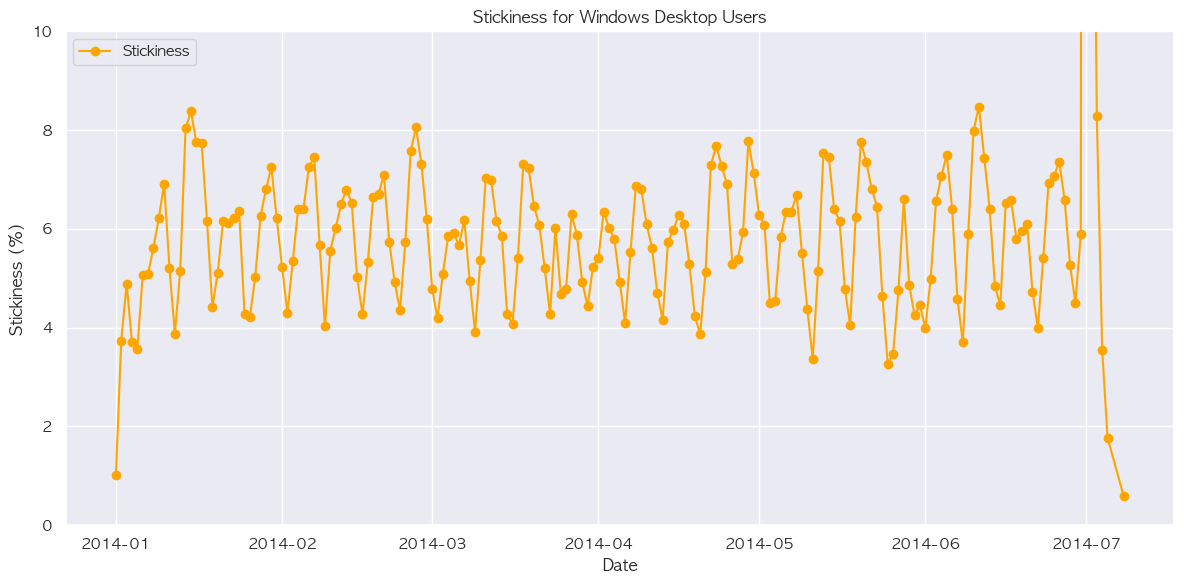

In [42]:
# Windows Desktop 유저들의 Stickiness 시각화

plt.figure(figsize=(12, 6))
plt.plot(WindowsDesktop_df['session_timestamp'], WindowsDesktop_df['stickiness'], label='Stickiness', marker='o', color='orange')
plt.title('Stickiness for Windows Desktop Users')
plt.xlabel('Date')
plt.ylabel('Stickiness (%)')
plt.ylim(0, 10)  # y축 눈금 범위를 0에서 10%로 설정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Mac Desktop 유저들에 비해 Windows Desktop 유저들의 서비스 고착도가 조금 더 높은 것을 알 수 있다.
- 2014년 1월 중반과 6월 중반에 8%를 넘는 지점도 보인다

In [43]:
# iPhone 유저들의 DAU 계산
dau = calculate_active_users_device5(merged_df[merged_df['device_type'] == 'iPhone'], 'D')
dau = dau.rename(columns={'user_id': 'dau'})
dau['month'] = dau['session_timestamp'].dt.month

# iPhone 유저들의 MAU 계산
mau = calculate_active_users_device5(merged_df[merged_df['device_type'] == 'iPhone'], 'M')
mau = mau.rename(columns={'user_id': 'mau'})
mau['month'] = mau['session_timestamp'].dt.month

# DAU에서 필요한 컬럼만 추출
dau_selected = dau[['session_timestamp', 'dau', 'month']]

# MAU에서 필요한 컬럼만 추출
mau_selected = mau[['mau', 'month']]

# DAU와 MAU 병합
iPhone_df = pd.merge(dau_selected, mau_selected, on='month', how='left')

# Stickiness 계산
iPhone_df['stickiness'] = (iPhone_df['dau'] / iPhone_df['mau']) * 100

iPhone_df.describe()

,session_timestamp,dau,month,mau,stickiness
count,187,187.000000,187.000000,187.000000,187.000000
mean,2014-04-04 00:07:42.032085504,119.796791,3.620321,2435.390374,5.333288
min,2014-01-01 00:00:00,1.000000,1.000000,123.000000,0.813008
25%,2014-02-16 12:00:00,58.000000,2.000000,1107.000000,4.300303
50%,2014-04-04 00:00:00,91.000000,4.000000,1593.000000,4.789207
75%,2014-05-20 12:00:00,173.500000,5.000000,3782.000000,5.549950
max,2014-07-07 00:00:00,288.000000,7.000000,4568.000000,87.804878
std,NaN,72.181308,1.796117,1407.104058,6.181867


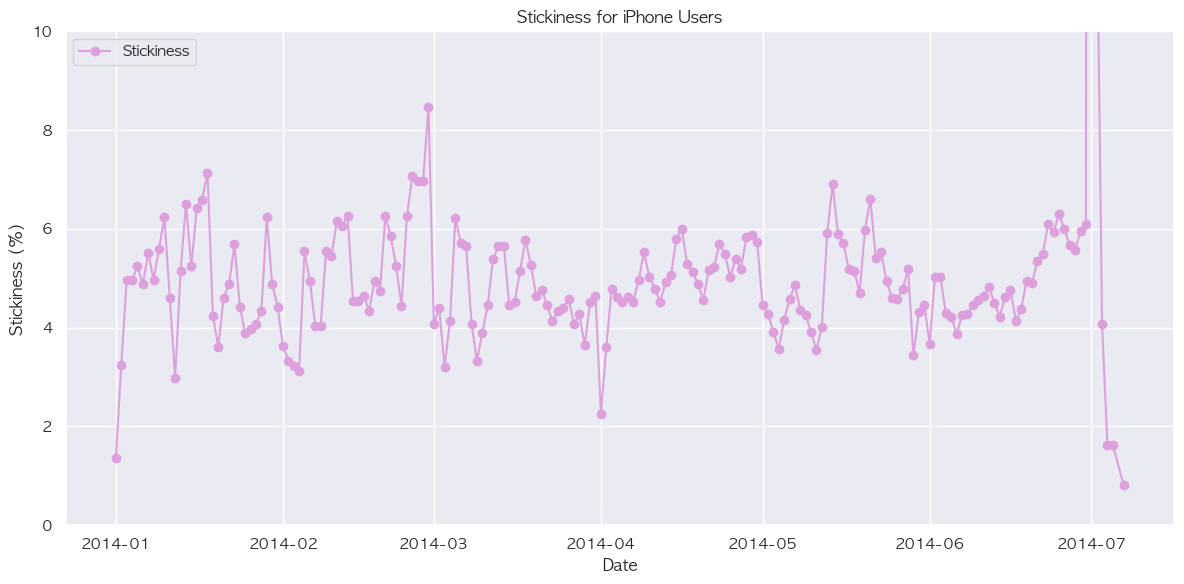

In [44]:
# iPhone 유저들의 Stickiness 시각화

plt.figure(figsize=(12, 6))
plt.plot(iPhone_df['session_timestamp'], iPhone_df['stickiness'], label='Stickiness', marker='o', color='#DDA0DD')
plt.title('Stickiness for iPhone Users')
plt.xlabel('Date')
plt.ylabel('Stickiness (%)')
plt.ylim(0, 10)  # y축 눈금 범위를 0에서 10%로 설정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- 데스크탑 유저들에 비해 iPhone 유저들의 서비스 고착도가 상대적으로 변동이 심한 것을 알 수 있다.
- 또한, 데스크탑 유저들에 비해 서비스 고착도 평균값이 1% 정도 낮았다.
- 이는 (위에서 언급했다 시피) 숙소 예약 서비스의 경우, 공간을 파악할 수 있는 시각적인 요소가 중요한데, 모바일 기기는 데스크탑 화면에 비해 크기가 작기 때문에 사용자가 불편함을 느낄 수 있다. 그 결과 데스크탑보다 모바일 기기의 서비스 고착도가 낮아진 것을 추측된다.

In [45]:
# Android Phone 유저들의 DAU 계산
dau = calculate_active_users_device5(merged_df[merged_df['device_type'] == 'Android Phone'], 'D')
dau = dau.rename(columns={'user_id': 'dau'})
dau['month'] = dau['session_timestamp'].dt.month

# Android Phone 유저들의 MAU 계산
mau = calculate_active_users_device5(merged_df[merged_df['device_type'] == 'Android Phone'], 'M')
mau = mau.rename(columns={'user_id': 'mau'})
mau['month'] = mau['session_timestamp'].dt.month

# DAU에서 필요한 컬럼만 추출
dau_selected = dau[['session_timestamp', 'dau', 'month']]

# MAU에서 필요한 컬럼만 추출
mau_selected = mau[['mau', 'month']]

# DAU와 MAU 병합
AndroidPhone_df = pd.merge(dau_selected, mau_selected, on='month', how='left')

# Stickiness 계산
AndroidPhone_df['stickiness'] = (AndroidPhone_df['dau'] / AndroidPhone_df['mau']) * 100

AndroidPhone_df.describe()

,session_timestamp,dau,month,mau,stickiness
count,185,185.000000,185.000000,185.000000,185.000000
mean,2014-04-03 00:00:00,26.535135,3.583784,548.259459,5.213911
min,2014-01-01 00:00:00,1.000000,1.000000,26.000000,1.546392
25%,2014-02-16 00:00:00,10.000000,2.000000,214.000000,3.703704
50%,2014-04-03 00:00:00,14.000000,4.000000,270.000000,4.536862
75%,2014-05-19 00:00:00,45.000000,5.000000,1058.000000,5.607477
max,2014-07-04 00:00:00,89.000000,7.000000,1294.000000,73.076923
std,NaN,23.353151,1.770764,448.049769,5.324386


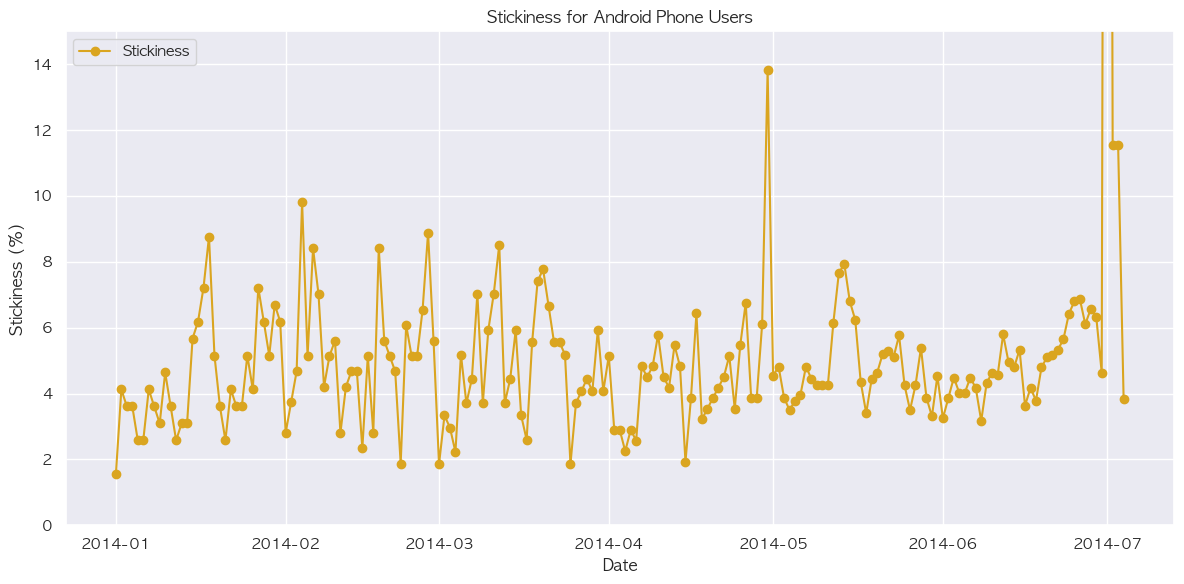

In [46]:
# Android Phone 유저들의 Stickiness 시각화

plt.figure(figsize=(12, 6))
plt.plot(AndroidPhone_df['session_timestamp'], AndroidPhone_df['stickiness'], label='Stickiness', marker='o', color='#DAA520')
plt.title('Stickiness for Android Phone Users')
plt.xlabel('Date')
plt.ylabel('Stickiness (%)')
plt.ylim(0, 15)  # y축 눈금 범위를 0에서 15%로 설정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- iPhone에 비해 Android Phone 유저들의 서비스 고착도 평균은 낮았지만, 2014년 4월 말에 급격히 상승한 구간이 발생했다.(약14%)
- 2014년 4월 25일 국제판 갤럭시 노트 II(GT-N7100)의 4.4.2 킷캣 업그레이드가 실시되었다고 한다. 안드로이드 킷캣은 구글이 개발한 안드로이드 계열의 안드로이드 버전이다. 이러한 운영체제 업데이트가 Android Phone 유저들의 행동에 변화를 주었을 수 있다고 판단된다.

# 운영체제별로 DAU, WAU, MAU 계산 및 시각화

## 운영체제 나누기
- Windows : 'Windows Desktop', 'Windows Phone'
- Linux(Android) : 'Android Phone', 'Android App Unknown Phone/Tablet' 'Linux Desktop', 'Tablet', 'Opera Phone'
- iOS/ipadOS/macOS : 'Mac Desktop', 'iPhone', 'iPad Tablet', 'iPodtouch', 'Opera Phone'
- others : '-unknown-', 'Chromebook', 'Blackberry', 'Tablet'

※ tablet의 경우, 정확한 제품명이 적혀있지 않아서 안드로이드 혹은 기타에 해당된다고 판단함.(iOS는 이미 나와있으므로)

※ Blackberry는 이미 단종된 제품이지만 데이터가 생성된 시점 기준으로 자체 운영체제를 사용 → '기타'에 해당

※ Chromebook도 자체 운영체제를 사용 → '기타'에 해당

※ Opera Phone(모바일)은 안드로이드, iOS, iPadOS 모두 가능하다고 함

In [47]:
# OS 분류 함수
def categorize_os(device_type):
    if device_type in ['Windows Desktop', 'Windows Phone']:
        return 'Windows'
    elif device_type in ['Android Phone', 'Android App Unknown Phone/Tablet', 'Linux Desktop', 'Tablet', 'Opera Phone']:
        return 'Linux(Android)'
    elif device_type in ['Mac Desktop', 'iPhone', 'iPad Tablet', 'iPodtouch']:
        return 'iOS/ipadOS/macOS'
    else:
        return 'others'

# OS 컬럼 생성
merged_df['OS'] = merged_df['device_type'].apply(categorize_os)

merged_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel,session_timestamp,OS
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaT,2014-01-01 02:32:47,api,2014-01-01 13:08:00,iOS/ipadOS/macOS
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct,2014-01-02 05:23:52,iOS/ipadOS/macOS
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct,2014-01-02 03:03:31,iOS/ipadOS/macOS
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-04 18:03:32,iOS/ipadOS/macOS
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-05 10:10:12,iOS/ipadOS/macOS
...,...,...,...,...,...,...,...,...,...,...,...,...
9092121,osn94hm062,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,18959.0,NaT,NaT,NaT,NaN,NaT,iOS/ipadOS/macOS
9092122,cpszutqnd1,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,21890.0,NaT,NaT,NaT,NaN,NaT,iOS/ipadOS/macOS
9092123,ii1y9pqmsc,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,10513.0,NaT,NaT,NaT,NaN,NaT,iOS/ipadOS/macOS
9092124,ssqamfzu1e,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,1222.0,NaT,NaT,NaT,NaN,NaT,Windows


## 운영체제별로 DAU, WAU, MAU 계산

In [48]:
# OS 별 DAU, WAU, MAU 계산 함수 정의
def calculate_active_users_os(merged_df, freq):
    active_users = merged_df.groupby([pd.Grouper(key='session_timestamp', freq=freq), 'OS'])['user_id'].nunique().reset_index()
    active_users = active_users.pivot(index='session_timestamp', columns='OS', values='user_id').fillna(0)
    return active_users

In [49]:
# DAU by OS
dau = calculate_active_users_os(merged_df, 'D')
dau.reset_index(inplace=True)
dau['month'] = dau['session_timestamp'].dt.month

dau

OS,session_timestamp,Linux(Android),Windows,iOS/ipadOS/macOS,others,month
0,2014-01-01,17.0,36.0,73.0,30.0,1
1,2014-01-02,42.0,133.0,195.0,55.0,1
2,2014-01-03,49.0,174.0,270.0,72.0,1
3,2014-01-04,34.0,132.0,259.0,57.0,1
4,2014-01-05,41.0,127.0,270.0,63.0,1
...,...,...,...,...,...,...
187,2014-07-07,0.0,0.0,3.0,0.0,7
188,2014-07-08,0.0,1.0,0.0,0.0,7
189,2014-07-11,0.0,0.0,1.0,0.0,7
190,2014-07-12,0.0,0.0,1.0,0.0,7


In [50]:
# WAU by OS
wau = calculate_active_users_os(merged_df, 'W')
wau.reset_index(inplace=True)

wau

OS,session_timestamp,Linux(Android),Windows,iOS/ipadOS/macOS,others
0,2014-01-05,124.0,384.0,716.0,248.0
1,2014-01-12,189.0,852.0,1467.0,410.0
2,2014-01-19,240.0,1003.0,1530.0,477.0
3,2014-01-26,233.0,871.0,1397.0,403.0
4,2014-02-02,227.0,906.0,1320.0,363.0
5,2014-02-09,253.0,885.0,1353.0,384.0
6,2014-02-16,237.0,840.0,1424.0,400.0
7,2014-02-23,239.0,860.0,1393.0,358.0
8,2014-03-02,251.0,929.0,1562.0,389.0
9,2014-03-09,246.0,857.0,1583.0,435.0


In [51]:
# MAU by OS
mau = calculate_active_users_os(merged_df, 'M')
mau.reset_index(inplace=True)
mau['month'] = mau['session_timestamp'].dt.month

mau

OS,session_timestamp,Linux(Android),Windows,iOS/ipadOS/macOS,others,month
0,2014-01-31,895,3559,5580,1772,1
1,2014-02-28,913,3328,5201,1481,2
2,2014-03-31,1073,3657,6652,1956,3
3,2014-04-30,1191,4185,8064,2147,4
4,2014-05-31,1355,4877,9619,2532,5
5,2014-06-30,1565,4766,10578,3154,6
6,2014-07-31,34,169,325,36,7


## (1) OS별 DAU 시각화

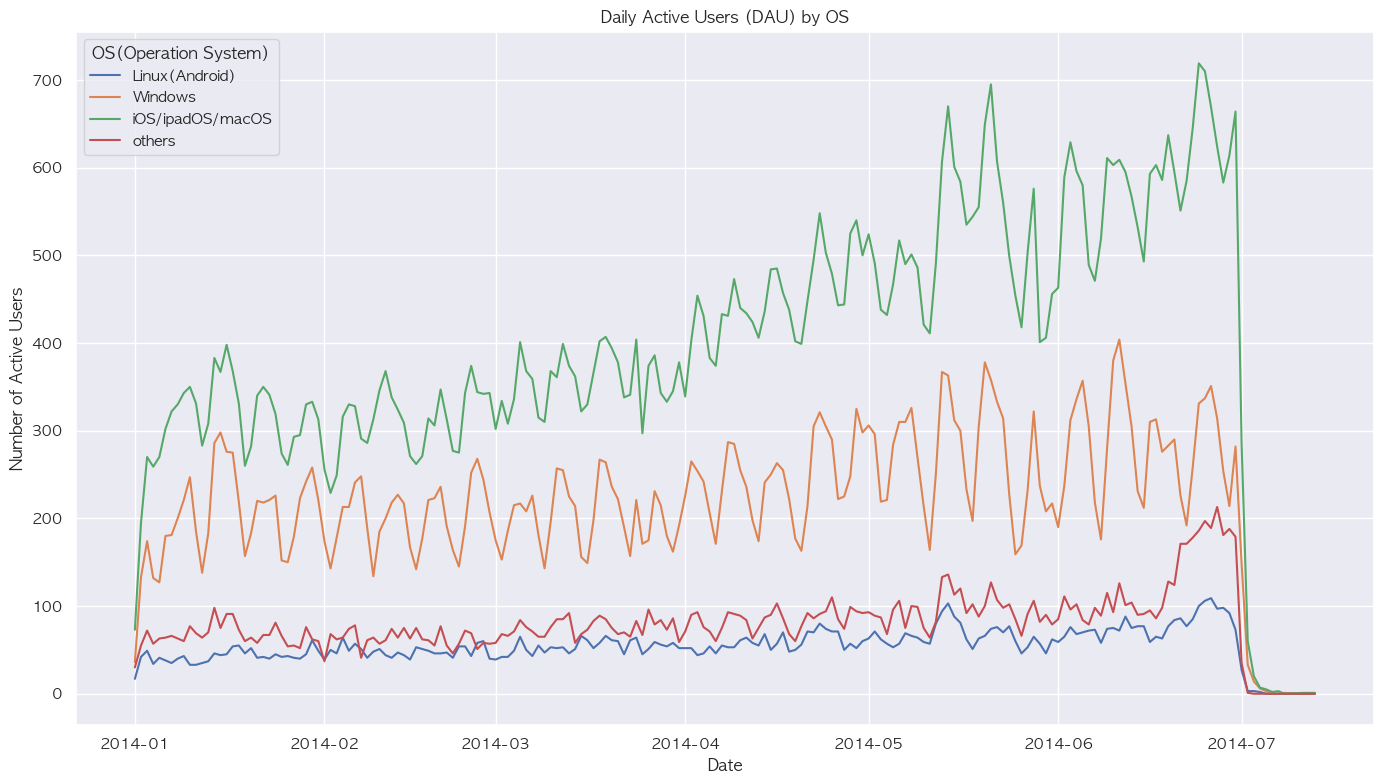

In [52]:
# 시각화 함수 정의
def plot_active_users_os(df, title):
    plt.figure(figsize=(14, 8))
    for os in df.columns[1:-1]:  # Exclude 'session_timestamp' and 'month'
        plt.plot(df['session_timestamp'], df[os], label=os)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Active Users')
    plt.legend(title='OS(Operation System)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 운영체제별 일일 활성 사용자 시각화
plot_active_users_os(dau, 'Daily Active Users (DAU) by OS')

- 전반적으로 모든 운영체제에 대한 활성 사용자의 수가 증가하는 추세를 보이고 있다.
- others, Linux(Android)에 비해서는 iOS/ipadOS/macOS와 Windows 사용자들의 수가 많은 것을 알 수 있다.
- 위의 device_type별 활성사용자 결과에 기반했을 때, 모바일 환경보다는 데스크탑 내 운영체제에서 보다 많은 활성 사용자를 보유하고 있는 것으로 추측된다.
- 전체 운영체제에 대하여 2014년 5월 중반에 급격하게 활성사용자가 증가한 지점을 발견했다. 

## (2) OS별 WAU 시각화

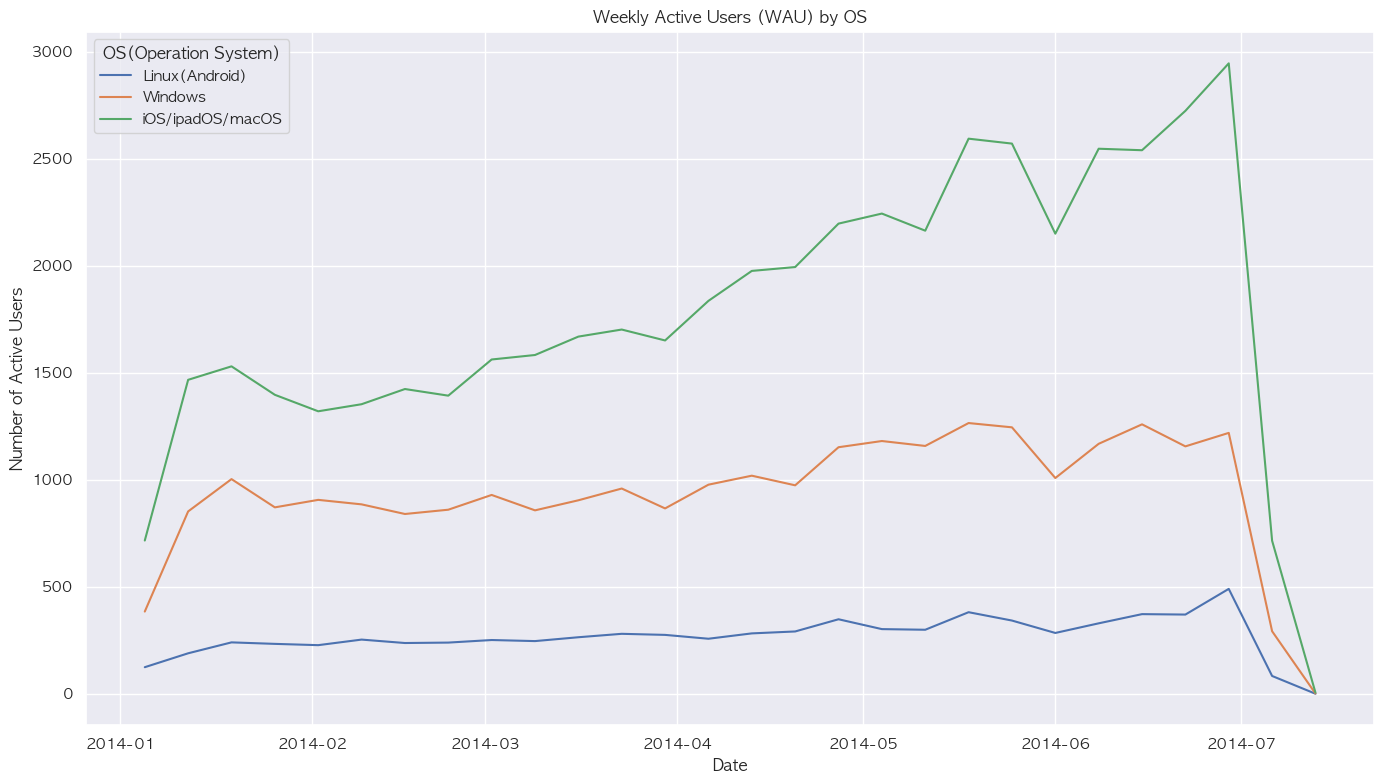

In [53]:
# 운영체제별 주간 활성 사용자 시각화
plot_active_users_os(wau, 'Weekly Active Users (WAU) by OS')

## (3) OS별 MAU 시각화

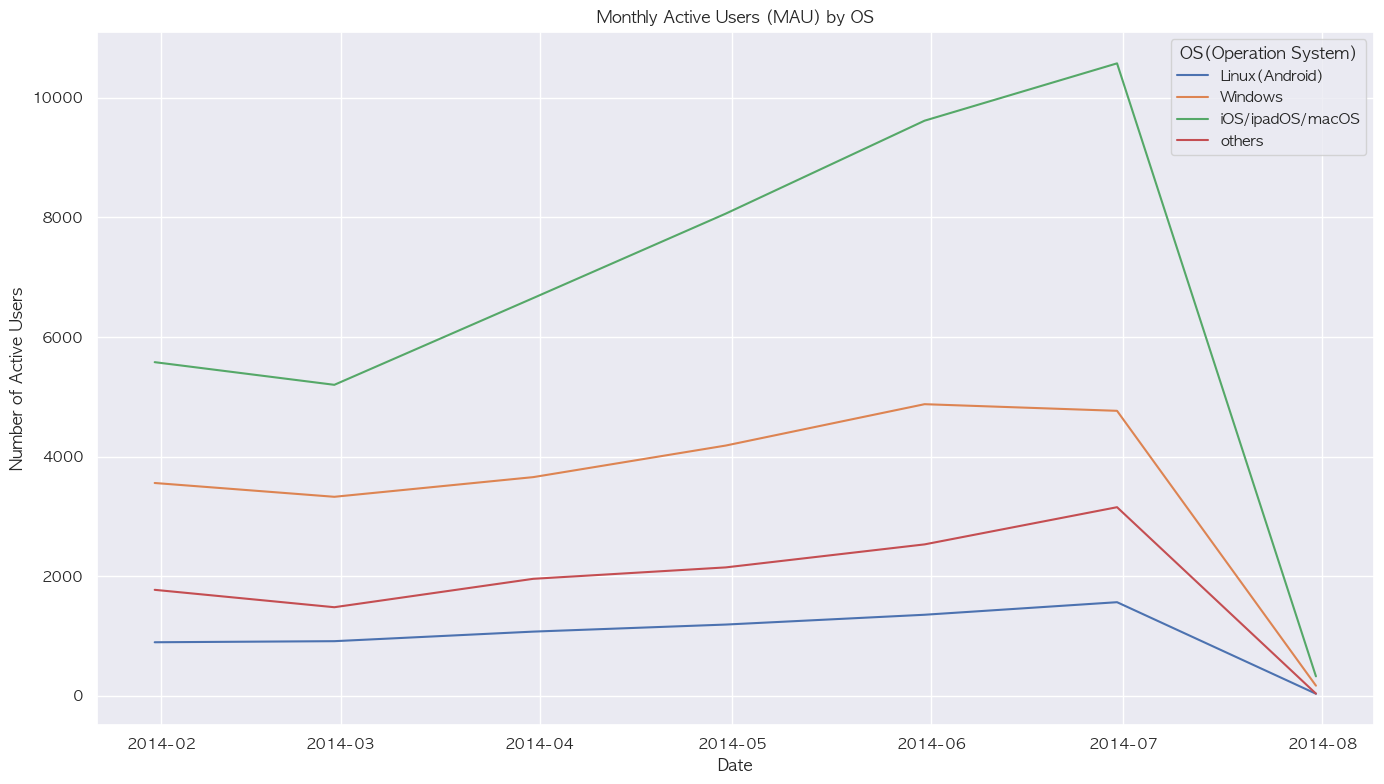

In [54]:
# 운영체제별 월간 활성 사용자 시각화
plot_active_users_os(mau, 'Monthly Active Users (MAU) by OS')

# 운영체제 별 Stickiness 계산 및 시각화

In [55]:
# OS 별 DAU, WAU, MAU 계산 함수 정의
def calculate_active_users_os(merged_df, freq):
    active_users = merged_df.groupby([pd.Grouper(key='session_timestamp', freq=freq), 'OS'])['user_id'].nunique().reset_index()
    active_users = active_users.pivot(index='session_timestamp', columns='OS', values='user_id').fillna(0)
    return active_users

# DAU by OS
dau = calculate_active_users_os(merged_df, 'D')
dau.reset_index(inplace=True)
dau['month'] = dau['session_timestamp'].dt.month

# MAU by OS
mau = calculate_active_users_os(merged_df, 'M')
mau.reset_index(inplace=True)
mau['month'] = mau['session_timestamp'].dt.month

# DAU와 MAU 데이터 프레임 병합
dau_mau = pd.merge(dau, mau, on=['session_timestamp', 'month'], suffixes=('_dau', '_mau'))

# Stickiness 계산
for os in dau.columns[1:-1]:  # Exclude 'session_timestamp' and 'month'
    dau_mau[f'stickiness_{os}'] = (dau_mau[f'{os}_dau'] / dau_mau[f'{os}_mau']) * 100

# Stickiness 데이터 프레임 생성
stickiness_cols = [col for col in dau_mau.columns if 'stickiness' in col]
stickiness_os_df = dau_mau[['session_timestamp'] + stickiness_cols]
stickiness_os_df

OS,session_timestamp,stickiness_Linux(Android),stickiness_Windows,stickiness_iOS/ipadOS/macOS,stickiness_others
0,2014-01-31,5.474860,6.209609,5.609319,3.386005
1,2014-02-28,4.381161,6.219952,6.594886,3.848751
2,2014-03-31,4.846226,5.250205,5.682502,3.016360
3,2014-04-30,5.037783,7.120669,6.200397,4.285049
4,2014-05-31,4.575646,4.449457,4.740618,3.120063
5,2014-06-30,4.664537,5.916911,6.277179,5.675333


In [56]:
stickiness_os_df.describe()

OS,session_timestamp,stickiness_Linux(Android),stickiness_Windows,stickiness_iOS/ipadOS/macOS,stickiness_others
count,6,6.000000,6.000000,6.000000,6.000000
mean,2014-04-15 08:00:00,4.830035,5.861134,5.850817,3.888593
min,2014-01-31 00:00:00,4.381161,4.449457,4.740618,3.016360
25%,2014-03-07 18:00:00,4.597869,5.416882,5.627615,3.186549
50%,2014-04-15 00:00:00,4.755381,6.063260,5.941449,3.617378
75%,2014-05-23 06:00:00,4.989894,6.217366,6.257983,4.175974
max,2014-06-30 00:00:00,5.474860,7.120669,6.594886,5.675333
std,NaN,0.388024,0.917147,0.659822,0.995513


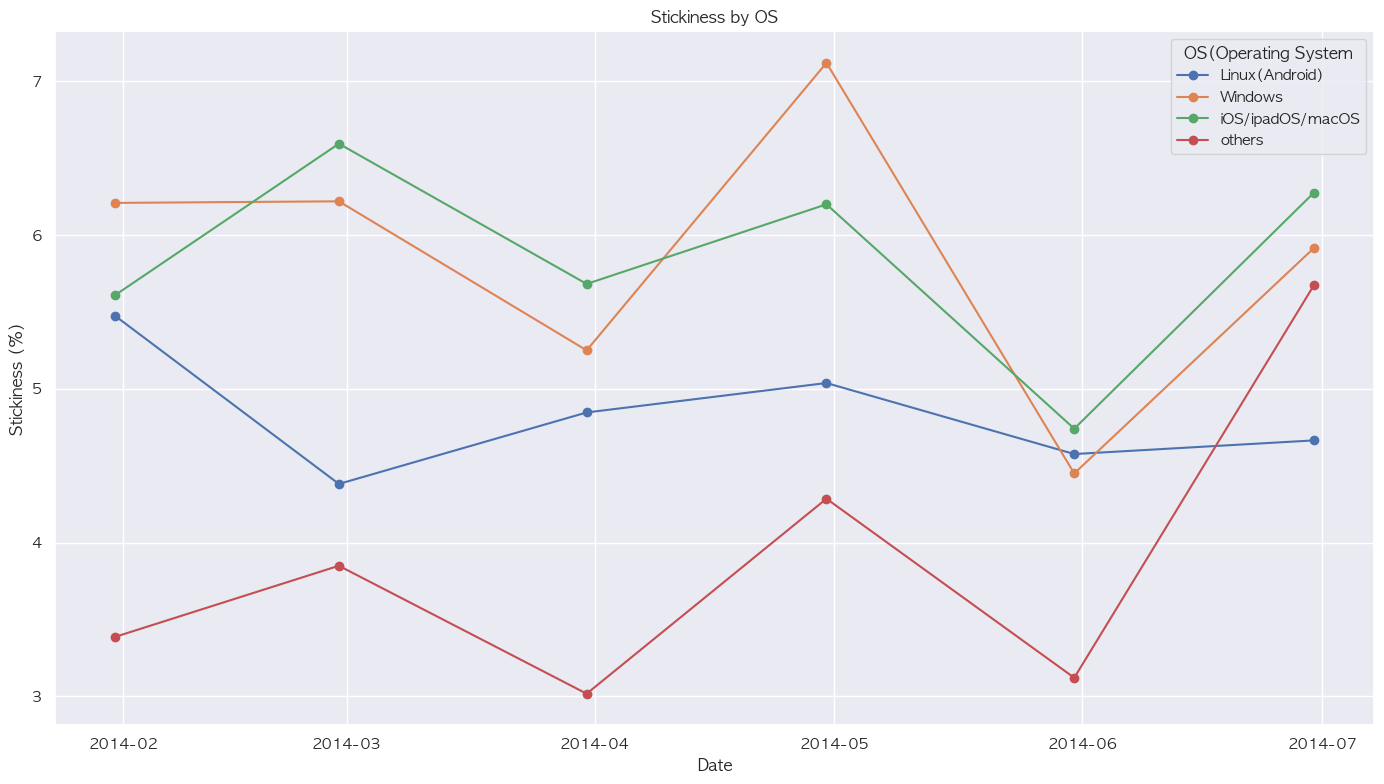

In [57]:
## 운영체제별 서비스 고착도 시각화

def plot_stickiness(df, title):
    plt.figure(figsize=(14, 8))
    for col in df.columns[1:]:  # Exclude 'session_timestamp'
        os_type = col.split('_')[-1]
        plt.plot(df['session_timestamp'], df[col], marker='o', label=os_type)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stickiness (%)')
    plt.legend(title='OS(Operating System')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# OS별 Stickiness 시각화
plot_stickiness(stickiness_os_df, 'Stickiness by OS')

- 전반적으로 서비스 고착도가 약 3~7%로 매우 낮은 것을 알 수 있었다.
- Linux(Android) 유저의 경우 Stickiness 평균치가 그렇게 높지는 않았지만, 조사 기간 내 타 운영체제보다 비교적 안정적인 형태를 보였다.
- 평균치로 비교했을 때, Windows가 iOS/ipadOS/macOS 운영체제 유저보다 서비스 고착도가 높았으며, 특히 2014년 5월에 두드러지게 증가한 지점을 발견할 수 있었다.
- 전체 운영체제 유저들의 서비스 고착도가 2014년 6월에 공통적으로 감소하는 추세를 보이는 것을 확인할 수 있었다. 여름 휴가 시즌에 접어들면서 여행 수요가 증가하지만, 예약 패턴이 바뀌어 일시적으로 Stickiness가 감소할 수 있다고 추측된다. 혹은 해당 기간 사용자 인터페이스 변화나 정책 변경 등이 영향을 줄 수 있을 것이다.
- 14년도 4월까지는 Windows에 비해 iOS/ipadOS/macOS 운영체제 유저들의 서비스 고착도가 높았지만, 14년도 5월에 Windows에 추월당했으며, 다시 14년도 6월에는 Windows보다 높은 서비스 고착도를 보였다.

<액션 플랜>
- 안정적인 사용 패턴을 보이는 Linux(Android) 유저를 대상으로 한 지속적인 서비스 제공 전략이 필요해보인다. Windows 유저들에게는 2014년 5월과 같은 긍정적인 경험을 지속적으로 제공하기 위한 마케팅 전략이 필요할 것이다.
- 전반적으로 낮은 Stickiness를 개선하기 위해 사용자 맞춤형 경험 제공, 빈번한 업데이트, 충성 고객 프로그램 등을 고려할 수 있다.
- 데이터에 기반했을 때, 현재 두 운영체제 유저들 간의 경쟁적인 서비스 사용 패턴을 보여주고 있다. iOS/ipadOS/macOS 유저들이 초기에는 더 자주 에어비엔비를 사용했지만, 특정 시점에서 Windows 유저들의 사용 빈도가 급격히 증가했다. 이러한 변동은 운영체제별 사용자 경험 차이, 프로모션, 혹은 외부 환경 변화 등 여러 요인이 작용했을 것으로 추측된다. iOS/ipadOS/macOS와 Windows 유저들 간의 차별화된 마케팅 및 사용자 경험 개선 방안을 마련할 필요가 있다. 두 그룹의 사용자 특성을 이해하고 이에 맞춘 전략을 구사해야 한다.

# Q. 사용 기기의 다양성이 유저 행동 패턴에 변화를 주는가?

# 가설 1. 화면 크기와 시각적 요소가 서비스 고착도에 영향을 미칠 것이다.

화면이 작은 기기(iPod touch, BlackBerry, iPhone) 사용자들은 화면이 큰 기기(데스크탑) 사용자들보다 에어비엔비의 시각적 요소(사진, 지도 등)를 파악하는 데 불편함을 느껴 서비스 고착도가 낮을 가능성이 있다.

### action, action_type, action_detail에서 시각적 요소와 관련된 액션
- action_type = view : 사용자가 특정 페이지나 요소를 보았음
    - **account_payout_preferences**: 계좌 출금 선호 설정 보기
    - **account_privacy_settings**: 계정 개인정보 설정 보기
    - **account_transaction_history**: 계정 거래 내역 보기
    - **airbnb_picks_wishlists**: 에어비앤비 추천 위시리스트 보기
    - **alteration_request**: 예약 변경 요청 보기
    - **cancellation_policies**: 취소 정책 보기
    - **change_or_alter**: 변경 또는 수정 사항 보기
    - **profile_references**: 프로필 참조 보기
    - **dashboard**: 대시보드 보기
    - **p1**: P1 페이지 보기 (구체적인 내용은 데이터셋 설명에 따라 다름)
    - **p3**: P3 페이지 보기 (구체적인 내용은 데이터셋 설명에 따라 다름)
    - **p5**: P5 페이지 보기 (구체적인 내용은 데이터셋 설명에 따라 다름)
    - **place_worth**: 추천할 만한 장소 보기
    - **previous_trips**: 이전 여행 보기
    - **popular_wishlists**: 인기 위시리스트 보기
    - **message_thread**: 메시지 스레드 보기
    - **message_inbox**: 메시지 인박스 보기
    - **manage_listing**: 목록 관리 페이지 보기
    - **login_page**: 로그인 페이지 보기
    - **edit_profile**: 프로필 편집 페이지 보기
    - **friends_wishlists**: 친구의 위시리스트 보기
    - **guest_itinerary**: 게스트 일정표 보기
    - **guest_receipt**: 게스트 영수증 보기
    - **homepage**: 홈페이지 보기
    - **host_guarantee**: 호스트 보증 페이지 보기
    - **host_home**: 호스트 홈 페이지 보기
    - **list_your_space**: 공간 목록 페이지 보기
    - **login_modal**: 로그인 모달 창 보기
    - **profile_verifications**: 프로필 인증 페이지 보기
    - **set_password_page**: 비밀번호 설정 페이지 보기
    - **signup_login_page**: 회원가입 및 로그인 페이지 보기
    - **signup_modal**: 회원가입 모달 창 보기
    - **terms_and_privacy**: 이용 약관 및 개인정보 페이지 보기
    - **user_listings**: 사용자 목록 보기
    - **user_profile**: 사용자 프로필 보기
    - **user_wishlists**: 사용자 위시리스트 보기
    - **view_search_results**: 검색 결과 보기
    - **wishlist**: 위시리스트 보기
    - **your_listings**: 본인의 목록 보기
    - **your_reservations**: 본인의 예약 보기
    - **your_trips**: 본인의 여행 보기

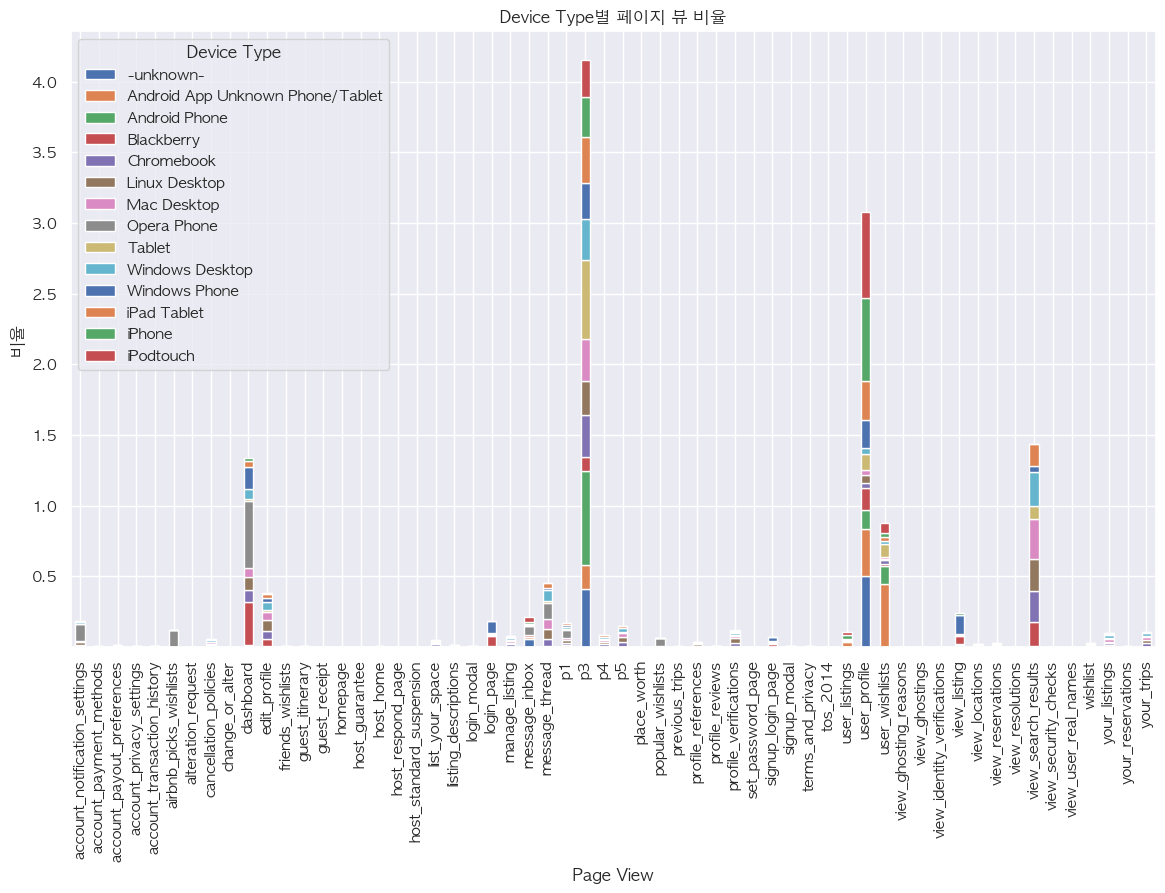

In [58]:
# 데이터 필터링
view_df = merged_df[merged_df['action_type'] == 'view']

# 기기별 페이지 뷰 수 계산
device_page_views = view_df.groupby(['device_type', 'action_detail']).size().unstack(fill_value=0)

# 페이지 뷰 비율 계산
device_page_view_ratios = device_page_views.div(device_page_views.sum(axis=1), axis=0)

# 결과 출력
device_page_view_ratios.T.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Device Type별 페이지 뷰 비율')
plt.xlabel('Page View')
plt.ylabel('비율')
plt.legend(title='Device Type')
plt.show()

In [59]:
# 수치 확인
device_page_view_ratios

action_detail,account_notification_settings,account_payment_methods,account_payout_preferences,account_privacy_settings,account_transaction_history,airbnb_picks_wishlists,alteration_request,cancellation_policies,change_or_alter,dashboard,...,view_locations,view_reservations,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,your_listings,your_reservations,your_trips
device_type,,,,,,,,,,,,,,,,,,,,,
-unknown-,0.000444,0.000063,0.000095,0.000063,0.000032,0.000063,0.000000,0.000190,0.000000,0.005927,...,0.000000,0.000285,0.000000,0.005515,0.000000,0.000000,0.000063,0.000444,0.000000,0.000444
Android App Unknown Phone/Tablet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Android Phone,0.000398,0.000019,0.000051,0.000019,0.000027,0.000012,0.000000,0.000012,0.000010,0.009852,...,0.011360,0.010648,0.000002,0.001410,0.000051,0.000000,0.000041,0.000509,0.000034,0.000174
Blackberry,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300283,...,0.000000,0.000000,0.000000,0.169972,0.000000,0.000000,0.000000,0.011331,0.000000,0.000000
Chromebook,0.011851,0.001293,0.002370,0.000862,0.001508,0.000000,0.000000,0.011635,0.000000,0.087697,...,0.000000,0.000000,0.000000,0.222150,0.000000,0.000000,0.010127,0.013575,0.000646,0.025426
Linux Desktop,0.019647,0.001004,0.002151,0.003729,0.002008,0.000287,0.000000,0.011903,0.000860,0.093217,...,0.000000,0.000000,0.000000,0.220422,0.000000,0.000000,0.004446,0.011616,0.000717,0.026101
Mac Desktop,0.011089,0.000510,0.002442,0.000932,0.001057,0.000088,0.000006,0.008783,0.000592,0.062897,...,0.000000,0.000000,0.000003,0.283572,0.000000,0.000000,0.005067,0.014837,0.000611,0.018697
Opera Phone,0.117647,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.470588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tablet,0.003538,0.000118,0.000413,0.000118,0.000138,0.000138,0.000000,0.003243,0.000118,0.018398,...,0.007685,0.006152,0.000000,0.091752,0.000039,0.000000,0.002988,0.008924,0.000216,0.005032


In [60]:
# 기기별 화면 크기 분류
device_screen_size = {
    '-unknown-': 'small',
    'Android App Unknown Phone/Tablet': 'small',
    'Android Phone': 'small',
    'Blackberry': 'small',
    'Chromebook': 'large',
    'Linux Desktop': 'large',
    'Mac Desktop': 'large',
    'Opera Phone': 'small',
    'Tablet': 'medium',
    'Windows Desktop': 'large',
    'Windows Phone': 'small',
    'iPad Tablet': 'medium',
    'iPhone': 'small',
    'iPodtouch': 'small'
}

merged_df['device_size'] = merged_df['device_type'].map(device_screen_size)
merged_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel,session_timestamp,OS,device_size
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaT,2014-01-01 02:32:47,api,2014-01-01 13:08:00,iOS/ipadOS/macOS,small
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct,2014-01-02 05:23:52,iOS/ipadOS/macOS,small
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct,2014-01-02 03:03:31,iOS/ipadOS/macOS,small
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-04 18:03:32,iOS/ipadOS/macOS,small
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-05 10:10:12,iOS/ipadOS/macOS,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092121,osn94hm062,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,18959.0,NaT,NaT,NaT,NaN,NaT,iOS/ipadOS/macOS,large
9092122,cpszutqnd1,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,21890.0,NaT,NaT,NaT,NaN,NaT,iOS/ipadOS/macOS,large
9092123,ii1y9pqmsc,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,10513.0,NaT,NaT,NaT,NaN,NaT,iOS/ipadOS/macOS,large
9092124,ssqamfzu1e,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,1222.0,NaT,NaT,NaT,NaN,NaT,Windows,large


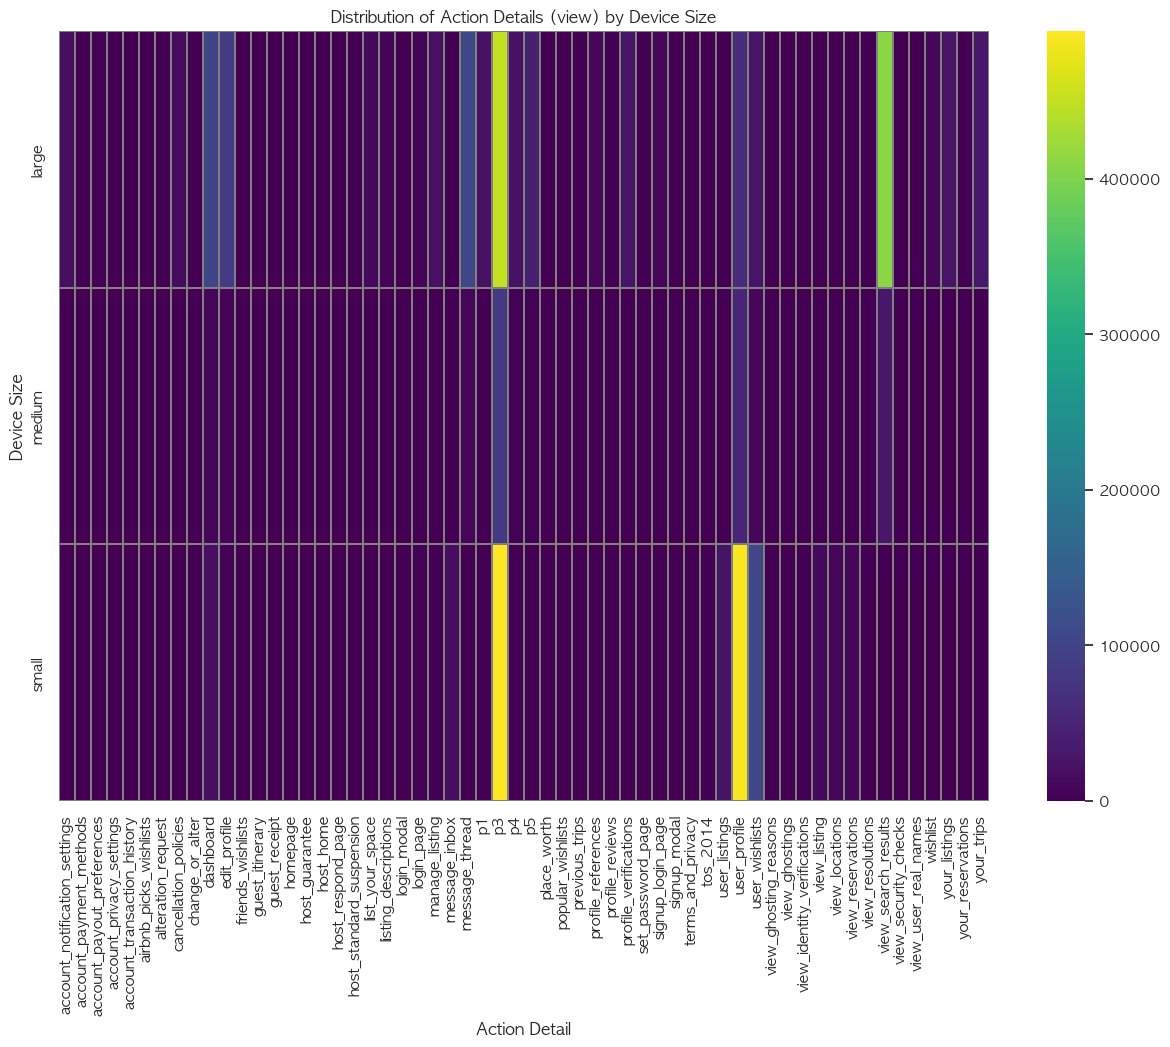

In [61]:
# action_type이 'view'인 경우 필터링
view_actions = merged_df[merged_df['action_type'] == 'view']

# device_size와 action_detail의 분포 확인
view_action_distribution = view_actions.groupby(['device_size', 'action_detail']).size().unstack().fillna(0)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(view_action_distribution, cmap='viridis', linewidths=0.1, linecolor='gray')
plt.title('Distribution of Action Details (view) by Device Size')
plt.xlabel('Action Detail')
plt.ylabel('Device Size')
plt.xticks(rotation=90)
plt.show()

In [62]:
# 상관계수 계산
merged_data = pd.DataFrame(device_size, )

correlation = merged_data.corr()

# 시각화
plt.figure(figsize = (10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Device size and Stickiness')
plt.show()

NameError: name 'device_size' is not defined

In [ ]:
merged_df.isnull().sum()

In [63]:
# 기기별 평균 세션 시간 및 페이지 뷰 수 계산
average_session_time = merged_df.groupby('device_size')['secs_elapsed'].mean()
page_views = merged_df[merged_df['action_type'] == 'view'].groupby('device_size')['action_detail'].count()

# DAU, MAU 계산 함수 정의
def calculate_active_users_device(merged_df, freq):
    active_users = merged_df.groupby([pd.Grouper(key='session_timestamp', freq=freq), 'device_size'])['user_id'].nunique().reset_index()
    active_users = active_users.pivot(index='session_timestamp', columns='device_size', values='user_id').fillna(0)
    return active_users

# DAU by device_size
dau = calculate_active_users_device(merged_df, 'D')
dau.reset_index(inplace=True)
dau['month'] = dau['session_timestamp'].dt.to_period('M').dt.to_timestamp()

# MAU by device_size
mau = calculate_active_users_device(merged_df, 'M')
mau.reset_index(inplace=True)
mau['month'] = mau['session_timestamp'].dt.to_period('M').dt.to_timestamp()

# DAU와 MAU 데이터 프레임 병합
dau_mau = pd.merge(dau, mau, on=['month'], suffixes=('_dau', '_mau'))

# Stickiness 계산
stickiness_cols = []
for device_size in dau.columns[1:-1]:  # Exclude 'session_timestamp' and 'month'
    stickiness_col = f'stickiness_{device_size}'
    dau_mau[stickiness_col] = (dau_mau[f'{device_size}_dau'] / dau_mau[f'{device_size}_mau']) * 100
    stickiness_cols.append(stickiness_col)

# Stickiness 데이터 프레임 생성
stickiness_device_df = dau_mau[['month'] + stickiness_cols]
stickiness_device_df

device_size,month,stickiness_large,stickiness_medium,stickiness_small
0,2014-01-01,1.120268,1.805869,1.719457
1,2014-01-01,3.605460,3.837472,3.378582
2,2014-01-01,4.815864,4.514673,4.585219
3,2014-01-01,4.184909,4.176072,3.891403
4,2014-01-01,4.133402,5.417607,4.223228
...,...,...,...,...
187,2014-07-01,0.284900,2.702703,0.598802
188,2014-07-01,0.284900,0.000000,0.000000
189,2014-07-01,0.000000,2.702703,0.000000
190,2014-07-01,0.284900,0.000000,0.000000


In [64]:
from scipy.stats import f_oneway

# 각 기기 그룹별 Stickiness 추출
small_stickiness = stickiness_device_df['stickiness_small']
medium_stickiness = stickiness_device_df['stickiness_medium']
large_stickiness = stickiness_device_df['stickiness_large']

# ANOVA를 사용한 그룹 간 차이 검증
anova_result = f_oneway(small_stickiness.dropna(), medium_stickiness.dropna(), large_stickiness.dropna())
print('ANOVA 결과:', anova_result)

ANOVA 결과: F_onewayResult(statistic=1.5028794942138912, pvalue=0.22336424975027758)


p-value가 0.22336424975027758로 0.05보다 큽니다. 이는 화면 크기별 Stickiness의 평균 차이가 통계적으로 유의미하지 않다는 것을 의미합니다.

즉, 귀무 가설(H0): "화면 크기별 Stickiness의 평균 차이가 없다"를 기각할 수 없습니다.

결론: 가설 1 ("화면이 작은 기기 유저들은 화면이 큰 기기 유저들보다 서비스 고착도가 낮을 것이다.")은 ANOVA 결과를 통해 검증되지 않았습니다.

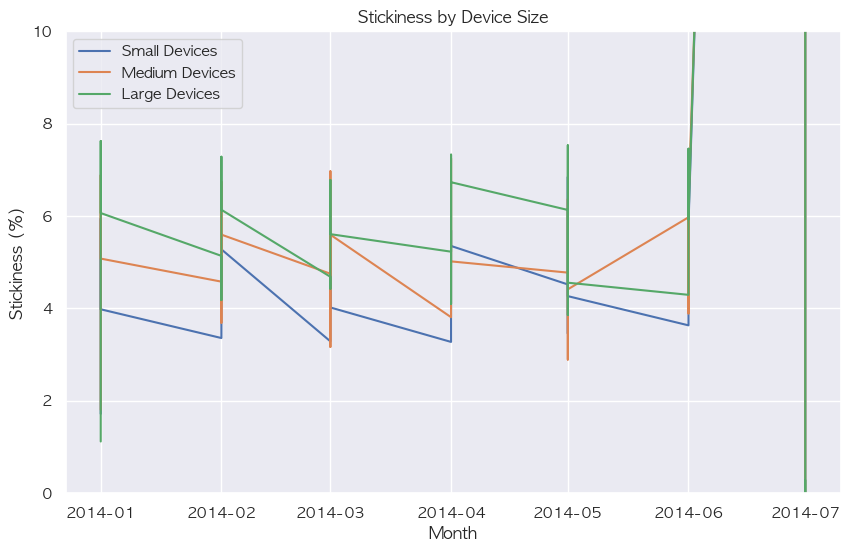

In [65]:
import matplotlib.pyplot as plt

# Stickiness 시각화
plt.figure(figsize=(10, 6))
plt.plot(stickiness_device_df['month'], stickiness_device_df['stickiness_small'], label='Small Devices')
plt.plot(stickiness_device_df['month'], stickiness_device_df['stickiness_medium'], label='Medium Devices')
plt.plot(stickiness_device_df['month'], stickiness_device_df['stickiness_large'], label='Large Devices')
plt.xlabel('Month')
plt.ylabel('Stickiness (%)')
plt.title('Stickiness by Device Size')
plt.ylim(0, 10)  # y축 눈금 범위를 0에서 10%로 설정
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# 기기별 평균 세션 시간 계산
device_session_time = sessions_df.groupby('device_type')['secs_elapsed'].mean().reset_index()
print(device_session_time)

# 특정 기기와 데스크탑 사용자의 평균 세션 시간 비교
specific_devices = ['iPodtouch', 'Blackberry', 'iPhone', 'Mac Desktop', 'Windows Desktop']
specific_device_session_time = device_session_time[device_session_time['device_type'].isin(specific_devices)]
print(specific_device_session_time)

                         device_type  secs_elapsed
0                          -unknown-   7066.962623
1   Android App Unknown Phone/Tablet   3996.032729
2                      Android Phone   4151.325228
3                         Blackberry  17562.064973
4                         Chromebook   6730.221923
5                      Linux Desktop   6568.264660
6                        Mac Desktop   5860.149941
7                        Opera Phone   8794.003682
8                             Tablet   4913.943468
9                    Windows Desktop   6012.171136
10                     Windows Phone  13838.952886
11                       iPad Tablet   5590.585055
12                            iPhone   4735.004075
13                         iPodtouch   4081.883480
        device_type  secs_elapsed
3        Blackberry  17562.064973
6       Mac Desktop   5860.149941
9   Windows Desktop   6012.171136
12           iPhone   4735.004075
13        iPodtouch   4081.883480


# 가설 2. 운영체제 업데이트가 사용자 행동에 영향을 미친다.
설명: 특정 운영체제(Android)의 대규모 업데이트가 사용자 행동에 긍정적인 영향을 미쳐 Stickiness가 급격히 증가할 수 있습니다. 예를 들어, 2014년 4월 말 안드로이드 킷캣 업데이트가 Android Phone 사용자의 Stickiness를 높였습니다.


In [68]:
# Android Phone 사용자의 2014년 4월 전후 Stickiness 비교
android_stickiness = stickiness_os_df[stickiness_os_df['Android Phone']
pre_update = android_stickiness[android_stickiness['session_timestamp'] < '2014-04-25'] # 운영체제 업데이트 전
post_update = android_stickiness[android_stickiness['session_timestamp'] >= '2014-04-25'] # 운영체제 업데이트 후
pre_update_mean = pre_update['stickiness'].mean() # 업뎃 전 서비스 고착도 평균
post_update_mean = post_update['stickiness'].mean() # 업뎃 후 서비스 고착도 평균
print(f'Pre-update Stickiness: {pre_update_mean}, Post-update Stickiness: {post_update_mean}')

KeyError: 'device_type'